In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold
from mllib.model import KerasSurrogate
from helper_functions.scan_helper_functions import AdjustedRSquared
from helper_functions.ml_helper_functions import RSquaredSeparated, AdjustedRSquaredSeparated
from helper_functions.invertible_neural_network import InvertibleNetworkSurrogate
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [2]:
seed = 49857
tf.random.set_seed(seed)
np.random.seed(seed)

# Config

In [3]:
directory = os.path.dirname(os.path.dirname(os.getcwd()))
directory

'/data/user/boiger_r/aerosol'

In [4]:
test_datafile = directory +'/aerosol_data/raw_data/test_scaling_woangles/logP11_P12_532/test_dataset.hdf5'




In [5]:
#model_name = 'invertible_model'
#val_model_name = 'forward_model'

In [6]:
#model_dir = directory +'/aerosol_results/simulated_data/models_overview/models_asha16'

In [7]:
#plot_dir = directory +'/aerosol_results/simulated_data/invertible_model4/plots/model'
#if not os.path.exists(plot_dir):
#    os.makedirs(plot_dir)

In [8]:
#test_datafile = directory +'/aerosol_data/raw_data/raw_data_preprocessed_wo_angles/test_dataset.hdf5'

In [9]:
model_name = 'invertible_model'
val_model_name = 'forward_model'

In [10]:
directory1 = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/'
directory1 = directory1 + 'test_scaling_woangles/logP11_P12_532'


In [11]:
plot_dir = directory1 + '/plots/model'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
#
model_dir = directory1 +'/model'
#if not os.path.exists(model_dir):
#    os.makedirs(model_dir)

# Load the model and the data (dvar, qoi) for testing

In [12]:
custom_objects = {'AdjustedRSquared': AdjustedRSquared}

kwargs = {'custom_objects': custom_objects,'compile': False}

surr = InvertibleNetworkSurrogate.load(model_dir, model_name, model_kwargs=kwargs)

In [13]:
dvar_test = pd.read_hdf(test_datafile,key = 'dvar')
qoi_test = pd.read_hdf(test_datafile,key = 'qoi')
dvar_test.reset_index(drop=True, inplace=True)
qoi_test.reset_index(drop=True, inplace=True)

In [14]:
dvar_test

V_tot  R_median       GSD         n   k_532nm
0      2217.771916  2.057228  1.411680  1.487770  0.080036
1      2289.484700  0.347572  1.418831  1.392117  0.024709
2      3729.921143  0.902338  1.402027  1.446767  0.087695
3      2059.242428  2.489947  1.438624  1.577567  0.142633
4      3981.638804  2.290383  1.435760  1.456930  0.004644
...            ...       ...       ...       ...       ...
19995  2589.057736  2.198749  1.432161  1.460649  0.010406
19996   909.147997  1.824980  1.405801  1.452012  0.067644
19997   575.016835  2.320553  1.418438  1.537582  0.072451
19998  4496.645635  2.119046  1.428187  1.385306  0.007064
19999  2612.147656  0.811673  1.447020  1.534501  0.032576

[20000 rows x 5 columns]

In [15]:
qoi_test

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0       -15.831790   -16.346805   -16.862557   -17.358490   -17.820362   
1       -15.246802   -15.273688   -15.305123   -15.340975   -15.381075   
2       -14.773952   -14.929886   -15.105840   -15.299153   -15.506050   
3       -16.258232   -16.849817   -17.415976   -17.907917   -18.357706   
4       -15.392191   -15.917443   -16.411984   -16.842795   -17.198289   
...            ...          ...          ...          ...          ...   
19995   -15.762311   -16.283419   -16.786999   -17.242826   -17.635319   
19996   -16.547818   -16.999116   -17.463018   -17.929038   -18.374465   
19997   -17.395356   -17.969478   -18.528054   -19.032193   -19.492077   
19998   -15.132316   -15.629822   -16.103897   -16.527719   -16.911970   
19999   -15.132801   -15.265938   -15.415246   -15.578100   -15.751441   

       P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
0        -18.194023    -18.557853    -18.854808    -19.085843    -19.282341   
1        -15.425148    -15.473089    -15.524658    -15.582012    -15.637832   
2        -15.724838    -15.952073    -16.180844    -16.424444    -16.652173   
3        -18.685493    -18.997539    -19.270061    -19.478333    -19.659280   
4        -17.461982    -17.686248    -17.862495    -17.982748    -18.096787   
...             ...           ...           ...           ...           ...   
19995    -17.933881    -18.199379    -18.412514    -18.557887    -18.694105   
19996    -18.769685    -19.160731    -19.471789    -19.721715    -19.935763   
19997    -19.833073    -20.159032    -20.436810    -20.651410    -20.835483   
19998    -17.221922    -17.451722    -17.605360    -17.735767    -17.850662   
19999    -15.933443    -16.121863    -16.313344    -16.511850    -16.698218   

       ...  P12_0.532_166  P12_0.532_167  P12_0.532_168  P12_0.532_169  \
0      ...      -0.024114      -0.023593      -0.021997      -0.019606   
1      ...      -0.239330      -0.224930      -0.207160      -0.186510   
2      ...      -0.266940      -0.258060      -0.242910      -0.220750   
3      ...       0.018034       0.015673       0.013527       0.011590   
4      ...       0.440040       0.386630       0.321510       0.236390   
...    ...            ...            ...            ...            ...   
19995  ...       0.368940       0.344540       0.306870       0.246930   
19996  ...      -0.082036      -0.079708      -0.074486      -0.066662   
19997  ...       0.006225       0.004320       0.002211       0.000091   
19998  ...       0.035291      -0.017567      -0.055952      -0.080564   
19999  ...      -0.563440      -0.536370      -0.494200      -0.438140   

       P12_0.532_170  P12_0.532_171  P12_0.532_172  P12_0.532_173  \
0          -0.016659      -0.013343      -0.009847      -0.006424   
1          -0.163690      -0.139560      -0.115070      -0.091176   
2          -0.191770      -0.157580      -0.121290      -0.086822   
3           0.009851       0.008290       0.006879       0.005584   
4           0.149420       0.075346       0.016061      -0.025712   
...              ...            ...            ...            ...   
19995       0.177860       0.112670       0.055055       0.010499   
19996      -0.056726      -0.045359      -0.033452      -0.022101   
19997      -0.001704      -0.002830      -0.003089      -0.002531   
19998      -0.094636      -0.103410      -0.103000      -0.090228   
19999      -0.372270      -0.302670      -0.235520      -0.175310   

       P12_0.532_174  P12_0.532_175  
0          -0.003407      -0.001132  
1          -0.068809      -0.048764  
2          -0.057503      -0.035058  
3           0.004381       0.003257  
4          -0.051252      -0.058725  
...              ...            ...  
19995      -0.019984      -0.033553  
19996      -0.012456      -0.005407  
19997      -0.001464      -0.000340  
19998      -0.059015      -0.004855  
19999      -0.124330      -0.0831

In [16]:
qoi_test

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0       -15.831790   -16.346805   -16.862557   -17.358490   -17.820362   
1       -15.246802   -15.273688   -15.305123   -15.340975   -15.381075   
2       -14.773952   -14.929886   -15.105840   -15.299153   -15.506050   
3       -16.258232   -16.849817   -17.415976   -17.907917   -18.357706   
4       -15.392191   -15.917443   -16.411984   -16.842795   -17.198289   
...            ...          ...          ...          ...          ...   
19995   -15.762311   -16.283419   -16.786999   -17.242826   -17.635319   
19996   -16.547818   -16.999116   -17.463018   -17.929038   -18.374465   
19997   -17.395356   -17.969478   -18.528054   -19.032193   -19.492077   
19998   -15.132316   -15.629822   -16.103897   -16.527719   -16.911970   
19999   -15.132801   -15.265938   -15.415246   -15.578100   -15.751441   

       P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
0        -18.194023    -18.557853    -18.854808    -19.085843    -19.282341   
1        -15.425148    -15.473089    -15.524658    -15.582012    -15.637832   
2        -15.724838    -15.952073    -16.180844    -16.424444    -16.652173   
3        -18.685493    -18.997539    -19.270061    -19.478333    -19.659280   
4        -17.461982    -17.686248    -17.862495    -17.982748    -18.096787   
...             ...           ...           ...           ...           ...   
19995    -17.933881    -18.199379    -18.412514    -18.557887    -18.694105   
19996    -18.769685    -19.160731    -19.471789    -19.721715    -19.935763   
19997    -19.833073    -20.159032    -20.436810    -20.651410    -20.835483   
19998    -17.221922    -17.451722    -17.605360    -17.735767    -17.850662   
19999    -15.933443    -16.121863    -16.313344    -16.511850    -16.698218   

       ...  P12_0.532_166  P12_0.532_167  P12_0.532_168  P12_0.532_169  \
0      ...      -0.024114      -0.023593      -0.021997      -0.019606   
1      ...      -0.239330      -0.224930      -0.207160      -0.186510   
2      ...      -0.266940      -0.258060      -0.242910      -0.220750   
3      ...       0.018034       0.015673       0.013527       0.011590   
4      ...       0.440040       0.386630       0.321510       0.236390   
...    ...            ...            ...            ...            ...   
19995  ...       0.368940       0.344540       0.306870       0.246930   
19996  ...      -0.082036      -0.079708      -0.074486      -0.066662   
19997  ...       0.006225       0.004320       0.002211       0.000091   
19998  ...       0.035291      -0.017567      -0.055952      -0.080564   
19999  ...      -0.563440      -0.536370      -0.494200      -0.438140   

       P12_0.532_170  P12_0.532_171  P12_0.532_172  P12_0.532_173  \
0          -0.016659      -0.013343      -0.009847      -0.006424   
1          -0.163690      -0.139560      -0.115070      -0.091176   
2          -0.191770      -0.157580      -0.121290      -0.086822   
3           0.009851       0.008290       0.006879       0.005584   
4           0.149420       0.075346       0.016061      -0.025712   
...              ...            ...            ...            ...   
19995       0.177860       0.112670       0.055055       0.010499   
19996      -0.056726      -0.045359      -0.033452      -0.022101   
19997      -0.001704      -0.002830      -0.003089      -0.002531   
19998      -0.094636      -0.103410      -0.103000      -0.090228   
19999      -0.372270      -0.302670      -0.235520      -0.175310   

       P12_0.532_174  P12_0.532_175  
0          -0.003407      -0.001132  
1          -0.068809      -0.048764  
2          -0.057503      -0.035058  
3           0.004381       0.003257  
4          -0.051252      -0.058725  
...              ...            ...  
19995      -0.019984      -0.033553  
19996      -0.012456      -0.005407  
19997      -0.001464      -0.000340  
19998      -0.059015      -0.004855  
19999      -0.124330      -0.0831

In [17]:
qoi_columns = qoi_test.columns
dvar_columns = dvar_test.columns

In [18]:
qoi_test_plot = qoi_test.copy()

# Prediction

## Forward Prediction

In [19]:
import time
start = time.time()
qoi_pred_fw = surr.predict(dvar_test.values)
end = time.time()
time = (end-start)/len(dvar_test)
time

0.0002730860948562622

In [20]:
qoi_columns

Index(['P11_0.532_5', 'P11_0.532_6', 'P11_0.532_7', 'P11_0.532_8',
       'P11_0.532_9', 'P11_0.532_10', 'P11_0.532_11', 'P11_0.532_12',
       'P11_0.532_13', 'P11_0.532_14',
       ...
       'P12_0.532_166', 'P12_0.532_167', 'P12_0.532_168', 'P12_0.532_169',
       'P12_0.532_170', 'P12_0.532_171', 'P12_0.532_172', 'P12_0.532_173',
       'P12_0.532_174', 'P12_0.532_175'],
      dtype='object', length=320)

In [21]:
qoi_pred_fw.shape

(20000, 320)

In [22]:
qoi_pred_fw = pd.DataFrame(data=qoi_pred_fw, columns=qoi_columns)
qoi_pred_fw

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0       -15.830023   -16.364528   -16.884397   -17.382177   -17.856677   
1       -15.223397   -15.278360   -15.277835   -15.352356   -15.342388   
2       -14.746128   -14.895542   -15.049052   -15.289225   -15.523278   
3       -16.343809   -16.899125   -17.448716   -17.975425   -18.458672   
4       -15.360148   -15.868905   -16.477892   -16.874693   -17.216542   
...            ...          ...          ...          ...          ...   
19995   -15.712636   -16.233394   -16.775282   -17.283212   -17.700626   
19996   -16.574234   -17.006566   -17.506354   -17.957678   -18.395344   
19997   -17.398523   -17.987913   -18.541359   -19.083684   -19.533227   
19998   -15.105031   -15.583575   -16.075337   -16.522714   -16.963711   
19999   -15.148183   -15.276877   -15.454895   -15.630362   -15.713735   

       P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
0        -18.228826    -18.562308    -18.868992    -19.123222    -19.298439   
1        -15.413687    -15.489813    -15.526335    -15.613687    -15.611494   
2        -15.731574    -15.981257    -16.257964    -16.479737    -16.691099   
3        -18.721576    -19.018557    -19.296313    -19.523762    -19.683084   
4        -17.495488    -17.720283    -17.934361    -18.095727    -18.165237   
...             ...           ...           ...           ...           ...   
19995    -17.975704    -18.251022    -18.475785    -18.615756    -18.716594   
19996    -18.773284    -19.138415    -19.435240    -19.748488    -19.954132   
19997    -19.896405    -20.148935    -20.432518    -20.680950    -20.827978   
19998    -17.283180    -17.502178    -17.660025    -17.799157    -17.898583   
19999    -15.933890    -16.100778    -16.295931    -16.503407    -16.706763   

       ...  P12_0.532_166  P12_0.532_167  P12_0.532_168  P12_0.532_169  \
0      ...      -0.026452      -0.025920      -0.022900      -0.022974   
1      ...      -0.244977      -0.226705      -0.210784      -0.184366   
2      ...      -0.270039      -0.249602      -0.238356      -0.221125   
3      ...       0.005169       0.004683       0.004990       0.010789   
4      ...       0.413951       0.351396       0.293425       0.221740   
...    ...            ...            ...            ...            ...   
19995  ...       0.349836       0.320318       0.282749       0.231180   
19996  ...      -0.078820      -0.075759      -0.069944      -0.060027   
19997  ...      -0.001631       0.004586      -0.000492      -0.008181   
19998  ...       0.033875      -0.013868      -0.061679      -0.081375   
19999  ...      -0.562020      -0.519912      -0.478469      -0.433602   

       P12_0.532_170  P12_0.532_171  P12_0.532_172  P12_0.532_173  \
0          -0.016839      -0.015159      -0.007021      -0.003897   
1          -0.162573      -0.139672      -0.112501      -0.086490   
2          -0.197235      -0.150766      -0.117054      -0.080328   
3           0.016984       0.006765       0.012693       0.008280   
4           0.131771       0.063674       0.000452      -0.039833   
...              ...            ...            ...            ...   
19995       0.160617       0.106321       0.041466       0.006039   
19996      -0.047744      -0.039703      -0.027902      -0.017760   
19997      -0.007045      -0.005507      -0.004109      -0.000176   
19998      -0.094758      -0.106314      -0.105573      -0.081857   
19999      -0.371067      -0.291927      -0.227111      -0.163210   

       P12_0.532_174  P12_0.532_175  
0          -0.002032      -0.000276  
1          -0.066101      -0.046444  
2          -0.056189      -0.031680  
3           0.006673       0.000565  
4          -0.072660      -0.061364  
...              ...            ...  
19995      -0.027103      -0.033854  
19996      -0.008117      -0.005810  
19997      -0.002713      -0.001935  
19998      -0.046115       0.016604  
19999      -0.119908      -0.0772

In [23]:
qoi_pred_plot_fw = qoi_pred_fw.copy()
#qoi_pred_plot_fw

## Inverse prediction

In [24]:
import time
n_tries = 32
start = time.time()
dvar_pred_iv = surr.sample_n_tries(qoi_test.values, batch_size=128, n_tries=n_tries)
end = time.time()
iv_time = (end-start)/len(qoi_test)
iv_time

0.022210186898708344

In [25]:
dvar_pred_iv = pd.DataFrame(data=dvar_pred_iv, columns=dvar_columns)
dvar_pred_iv

V_tot  R_median       GSD         n   k_532nm
0      2209.887547  2.062579  1.407847  1.485853  0.079113
1      2356.435182  0.360849  1.416186  1.394805  0.024528
2      3800.096561  0.901557  1.404938  1.452073  0.088522
3      2027.655741  2.440569  1.429765  1.581106  0.140512
4      4064.593454  2.326055  1.442922  1.457931  0.004895
...            ...       ...       ...       ...       ...
19995  2704.504350  2.247610  1.440169  1.463246  0.010835
19996   966.413458  1.839020  1.403781  1.452507  0.067926
19997   521.080399  2.340790  1.417273  1.535160  0.072672
19998  4537.505361  2.151561  1.434178  1.386027  0.006645
19999  2500.921441  0.808249  1.439737  1.533890  0.032456

[20000 rows x 5 columns]

In [26]:
dvar_pred_iv.describe()

V_tot      R_median           GSD             n       k_532nm
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000
mean    2508.343137      1.334460      1.423978      1.465435      0.062843
std     1445.194861      0.680392      0.013227      0.078422      0.041657
min        1.034816      0.150007      1.400725      1.330001      0.000048
25%     1264.975952      0.741180      1.412091      1.396527      0.028651
50%     2487.287363      1.329888      1.423292      1.465309      0.058637
75%     3769.056013      1.924529      1.435429      1.533266      0.089182
max     4999.876002      2.499997      1.449999      1.599998      0.198938

# Calculate metrics

## R2

In [27]:
metric_fw = AdjustedRSquaredSeparated(qoi_test.shape[0], qoi_test.shape[1])

r2_adj_fw = metric_fw.call(qoi_test.values, qoi_pred_fw.values).numpy()
r2_adj_fw = pd.Series(data=r2_adj_fw, index=qoi_columns)
r2_adj_fw = np.round(r2_adj_fw, decimals=2)
r2_adj_fw = pd.DataFrame(r2_adj_fw).T
print('Forward model: ','R2_min = ', min(r2_adj_fw.min()),';  R2_max = ', max(r2_adj_fw.max()))

r2_adj_fw

Forward model:  R2_min =  0.99 ;  R2_max =  1.0


P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0          1.0          1.0          1.0          1.0          1.0   

   P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  ...  \
0           1.0           1.0           1.0           1.0           1.0  ...   

   P12_0.532_166  P12_0.532_167  P12_0.532_168  P12_0.532_169  P12_0.532_170  \
0            1.0            1.0            1.0            1.0            1.0   

   P12_0.532_171  P12_0.532_172  P12_0.532_173  P12_0.532_174  P12_0.532_175  
0           0.99            1.0           0.99           0.99           0.99  

[1 rows x 320 columns]

In [28]:
r2_adj_fw.sort_values(by=r2_adj_fw.index[0], axis = 1,ascending=True)

P12_0.532_175  P12_0.532_6  P12_0.532_30  P12_0.532_131  P12_0.532_174  \
0           0.99         0.99          0.99           0.99           0.99   

   P12_0.532_171  P12_0.532_173  P12_0.532_59  P12_0.532_58  P12_0.532_57  \
0           0.99           0.99           1.0           1.0           1.0   

   ...  P11_0.532_125  P11_0.532_123  P11_0.532_122  P11_0.532_121  \
0  ...            1.0            1.0            1.0            1.0   

   P11_0.532_120  P11_0.532_119  P11_0.532_118  P11_0.532_117  P11_0.532_124  \
0            1.0            1.0            1.0            1.0            1.0   

   P11_0.532_175  
0            1.0  

[1 rows x 320 columns]

In [29]:
np.mean(r2_adj_fw,axis = 1)

0    0.999781
dtype: float64

In [30]:
metric_iv = AdjustedRSquaredSeparated(dvar_test.shape[0], dvar_test.shape[1])

r2_adj_iv = metric_iv.call(dvar_test.values, dvar_pred_iv.values).numpy()
r2_adj_iv = pd.Series(data=r2_adj_iv, index=dvar_columns)
r2_adj_iv = np.round(r2_adj_iv, decimals=2)
r2_adj_iv = pd.DataFrame(r2_adj_iv).T
print('Inverse model: ','R2_min = ', min(r2_adj_iv.min()),';  R2_max = ', max(r2_adj_iv.max()))

r2_adj_iv

Inverse model:  R2_min =  0.71 ;  R2_max =  1.0


V_tot  R_median   GSD    n  k_532nm
0    1.0       1.0  0.71  1.0     0.99

In [31]:
np.mean(r2_adj_iv, axis = 1)

0    0.94
dtype: float64

# Relative error

In [32]:
rel_error_fw = (qoi_test - qoi_pred_fw) / qoi_test * 100.
rel_error_fw = pd.DataFrame(rel_error_fw, columns=qoi_columns).abs()

In [33]:
plot_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/test_scaling_woangles/logP11_P12_532/plots/model'

In [34]:
qoi_test.to_csv(f'{plot_dir}/qoi_test.csv')

In [35]:
qoi_pred_fw.to_csv(f'{plot_dir}/qoi_pred_fw.csv')

In [36]:
rel_error_fw

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0         0.011157     0.108423     0.129515     0.136456     0.203785   
1         0.153506     0.030592     0.178296     0.074188     0.251525   
2         0.188336     0.230040     0.375937     0.064896     0.111102   
3         0.526360     0.292632     0.187984     0.376975     0.549991   
4         0.208178     0.304934     0.401589     0.189387     0.106137   
...            ...          ...          ...          ...          ...   
19995     0.315154     0.307211     0.069800     0.234222     0.370321   
19996     0.159635     0.043824     0.248158     0.159740     0.113630   
19997     0.018207     0.102595     0.071808     0.270548     0.211115   
19998     0.180312     0.295893     0.177349     0.030284     0.305946   
19999     0.101647     0.071657     0.257210     0.335489     0.239379   

       P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
0          0.191288      0.024004      0.075229      0.195846      0.083483   
1          0.074301      0.108083      0.010800      0.203280      0.168430   
2          0.042839      0.182951      0.476616      0.336647      0.233758   
3          0.193109      0.110634      0.136232      0.233226      0.121084   
4          0.191877      0.192440      0.402332      0.628263      0.378242   
...             ...           ...           ...           ...           ...   
19995      0.233204      0.283762      0.343630      0.311825      0.120300   
19996      0.019175      0.116465      0.187705      0.135751      0.092140   
19997      0.319327      0.050087      0.021000      0.143037      0.036021   
19998      0.355702      0.289119      0.310502      0.357409      0.268456   
19999      0.002802      0.130781      0.106746      0.051130      0.051177   

       ...  P12_0.532_166  P12_0.532_167  P12_0.532_168  P12_0.532_169  \
0      ...       9.695145       9.862084       4.103477      17.180215   
1      ...       2.359615       0.789231       1.749306       1.149461   
2      ...       1.161024       3.277434       1.874857       0.169839   
3      ...      71.336762      70.120968      63.111116       6.915305   
4      ...       5.928756       9.113188       8.735380       6.197357   
...    ...            ...            ...            ...            ...   
19995  ...       5.178105       7.030380       7.860279       6.378353   
19996  ...       3.919948       4.953895       6.097529       9.953205   
19997  ...     126.194412       6.144916     122.269862    9069.055517   
19998  ...       4.013141      21.056517      10.236180       1.006393   
19999  ...       0.252027       3.068396       3.183100       1.035684   

       P12_0.532_170  P12_0.532_171  P12_0.532_172  P12_0.532_173  \
0           1.077628      13.608363      28.699430      39.330232   
1           0.682428       0.080543       2.232884       5.140036   
2           2.849861       4.324132       3.492073       7.480097   
3          72.413774      18.395041      84.524414      48.277580   
4          11.811880      15.491340      97.186788      54.918620   
...              ...            ...            ...            ...   
19995       9.694819       5.635169      24.682334      42.479362   
19996      15.833642      12.469330      16.591472      19.641658   
19997     313.437505      94.554394      33.024854      93.045761   
19998       0.129252       2.808431       2.497730       9.277468   
19999       0.323069       3.549365       3.570275       6.902291   

       P12_0.532_174  P12_0.532_175  
0          40.369073      75.592829  
1           3.935271       4.756987  
2           2.285685       9.635826  
3          52.322878      82.653947  
4          41.770196       4.493440  
...              ...            ...  
19995      35.624555       0.896551  
19996      34.833675       7.439772  
19997      85.320260     469.985494  
19998      21.858739     442.017952  
19999       3.556780       7.0410

In [37]:
rel_error_table_fw = np.round(rel_error_fw.quantile([0.5, 0.75, 0.9, 0.95, 0.99]).rename(index={
    0.5: '50%',
    0.75: '75%',
    0.9: '90%',
    0.95: '95%',
    0.99: '99%',
}), decimals=2)
rel_error_table_fw

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
50%         0.17         0.17         0.16         0.17         0.16   
75%         0.31         0.31         0.27         0.30         0.27   
90%         0.46         0.50         0.41         0.48         0.40   
95%         0.59         0.62         0.52         0.63         0.51   
99%         0.93         1.12         0.95         1.07         0.81   

     P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
50%          0.14          0.15          0.17          0.20          0.13   
75%          0.24          0.29          0.31          0.36          0.24   
90%          0.37          0.46          0.50          0.57          0.39   
95%          0.48          0.61          0.66          0.75          0.51   
99%          0.82          1.03          1.08          1.18          0.91   

     ...  P12_0.532_166  P12_0.532_167  P12_0.532_168  P12_0.532_169  \
50%  ...           5.89           6.42           6.10           6.95   
75%  ...          20.41          20.30          17.60          20.90   
90%  ...          60.08          66.17          49.49          65.33   
95%  ...         109.16         131.28          96.80         147.19   
99%  ...         576.67         585.37         475.28         747.56   

     P12_0.532_170  P12_0.532_171  P12_0.532_172  P12_0.532_173  \
50%           6.87           7.72           9.04           9.61   
75%          22.33          23.44          30.11          25.77   
90%          68.51          70.73          82.45          69.69   
95%         121.13         151.56         145.60         135.66   
99%         574.99         794.90         690.57         667.80   

     P12_0.532_174  P12_0.532_175  
50%           9.60           8.24  
75%          23.09          21.54  
90%          57.40          68.12  
95%         108.20         145.30  
99%         525.69         627.52  

[5 rows x 320 columns]

In [38]:
rel_error_table_fw.sort_values(by=rel_error_table_fw.index[3], axis = 1,ascending=False)

P12_0.532_30  P12_0.532_171  P12_0.532_169  P12_0.532_172  P12_0.532_175  \
50%          4.94           7.72           6.95           9.04           8.24   
75%         23.34          23.44          20.90          30.11          21.54   
90%         73.74          70.73          65.33          82.45          68.12   
95%        153.43         151.56         147.19         145.60         145.30   
99%        774.66         794.90         747.56         690.57         627.52   

     P12_0.532_173  P12_0.532_167  P12_0.532_164  P12_0.532_170  P12_0.532_10  \
50%           9.61           6.42           5.80           6.87          5.50   
75%          25.77          20.30          18.26          22.33         20.27   
90%          69.69          66.17          59.00          68.51         52.76   
95%         135.66         131.28         122.04         121.13        114.53   
99%         667.80         585.37         586.43         574.99        600.20   

     ...  P11_0.532_98  P11_0.532_83  P11_0.532_82  P11_0.532_106  \
50%  ...          0.10          0.10          0.09           0.10   
75%  ...          0.17          0.18          0.16           0.16   
90%  ...          0.26          0.27          0.26           0.25   
95%  ...          0.34          0.34          0.34           0.33   
99%  ...          0.63          0.63          0.63           0.62   

     P11_0.532_80  P11_0.532_126  P11_0.532_127  P11_0.532_111  P11_0.532_110  \
50%          0.09           0.10           0.10           0.10           0.09   
75%          0.16           0.16           0.17           0.17           0.16   
90%          0.25           0.25           0.25           0.26           0.25   
95%          0.33           0.33           0.33           0.33           0.32   
99%          0.67           0.64           0.62           0.67           0.63   

     P11_0.532_132  
50%           0.10  
75%           0.17  
90%           0.25  
95%           0.32  
99%           0.57  

[5 rows x 320 columns]

In [39]:
P11_532_columns = []
P12_532_columns = []
for name in qoi_columns:
    if 'P11' in name:
        P11_532_columns.append(name)
    if 'P12' in name:
        P12_532_columns.append(name)

In [40]:
rel_error_table_fw_P11 = rel_error_table_fw[P11_532_columns]
print(rel_error_table_fw_P11.max(axis = 1))
rel_error_table_fw_P12 = rel_error_table_fw[P12_532_columns]
print(rel_error_table_fw_P12.max(axis = 1))


50%    0.23
75%    0.43
90%    0.67
95%    0.92
99%    1.52
dtype: float64
50%      9.61
75%     30.11
90%     82.45
95%    153.43
99%    794.90
dtype: float64


In [41]:
rel_error_table_fw_P12.sort_values(by=rel_error_table_fw_P12.index[3], axis = 1,ascending=True)

P12_0.532_146  P12_0.532_128  P12_0.532_142  P12_0.532_112  \
50%           3.14           2.61           2.79           2.73   
75%           7.42           6.52           6.63           6.78   
90%          17.18          16.83          16.59          17.46   
95%          32.86          34.12          34.57          34.72   
99%         185.90         181.49         167.84         163.40   

     P12_0.532_147  P12_0.532_145  P12_0.532_127  P12_0.532_126  P12_0.532_73  \
50%           3.60           3.47           2.80           2.90          3.47   
75%           8.11           7.67           7.42           7.05          8.93   
90%          18.37          18.18          18.84          18.54         19.64   
95%          35.11          35.31          35.40          35.53         35.53   
99%         174.83         161.60         183.66         172.07        174.07   

     P12_0.532_140  ...  P12_0.532_10  P12_0.532_170  P12_0.532_164  \
50%           3.13  ...          5.50           6.87           5.80   
75%           6.89  ...         20.27          22.33          18.26   
90%          17.15  ...         52.76          68.51          59.00   
95%          35.53  ...        114.53         121.13         122.04   
99%         176.12  ...        600.20         574.99         586.43   

     P12_0.532_167  P12_0.532_173  P12_0.532_175  P12_0.532_172  \
50%           6.42           9.61           8.24           9.04   
75%          20.30          25.77          21.54          30.11   
90%          66.17          69.69          68.12          82.45   
95%         131.28         135.66         145.30         145.60   
99%         585.37         667.80         627.52         690.57   

     P12_0.532_169  P12_0.532_171  P12_0.532_30  
50%           6.95           7.72          4.94  
75%          20.90          23.44         23.34  
90%          65.33          70.73         73.74  
95%         147.19         151.56        153.43  
99%         747.56         794.90        774.66  

[5 rows x 160 columns]

In [42]:
max(rel_error_fw.max())

9282751.314808786

In [43]:
print('Forward model: max. rel. error in %')
print(rel_error_table_fw.max(axis = 1))

Forward model: max. rel. error in %
50%      9.61
75%     30.11
90%     82.45
95%    153.43
99%    794.90
dtype: float64


In [44]:
rel_error_iv = (dvar_test - dvar_pred_iv) / dvar_test * 100.
rel_error_iv = pd.DataFrame(rel_error_iv, columns=dvar_columns).abs()
rel_error_table_iv = np.round(rel_error_iv.quantile([0.5, 0.75, 0.9, 0.95, 0.99]).rename(index={
    0.5: '50%',
    0.75: '75%',
    0.9: '90%',
    0.95: '95%',
    0.99: '99%',
}), decimals=2)
rel_error_table_iv

V_tot  R_median   GSD     n  k_532nm
50%   1.76      0.78  0.23  0.12     1.71
75%   3.28      1.69  0.46  0.21     3.79
90%   6.25      3.81  0.89  0.34     9.45
95%  10.37      5.65  1.27  0.46    17.20
99%  55.64     10.31  1.94  1.13    70.54

In [45]:
rel_error_iv.min()

V_tot       0.000225
R_median    0.000005
GSD         0.000030
n           0.000031
k_532nm     0.000024
dtype: float64

In [46]:
rel_error_iv.max()

V_tot       1035.980712
R_median      39.809907
GSD            2.903361
n              2.660421
k_532nm     4414.561999
dtype: float64

In [47]:
print('Inverse model: max. rel. error in %')
print(rel_error_table_iv.max(axis = 1))

Inverse model: max. rel. error in %
50%     1.76
75%     3.79
90%     9.45
95%    17.20
99%    70.54
dtype: float64


# Plots
## qoi

In [48]:
presentation_plot_index = [0,1000,2000,5000,6000] 
#presentation_plot_index = [0,1,2,5,6,8,10] 

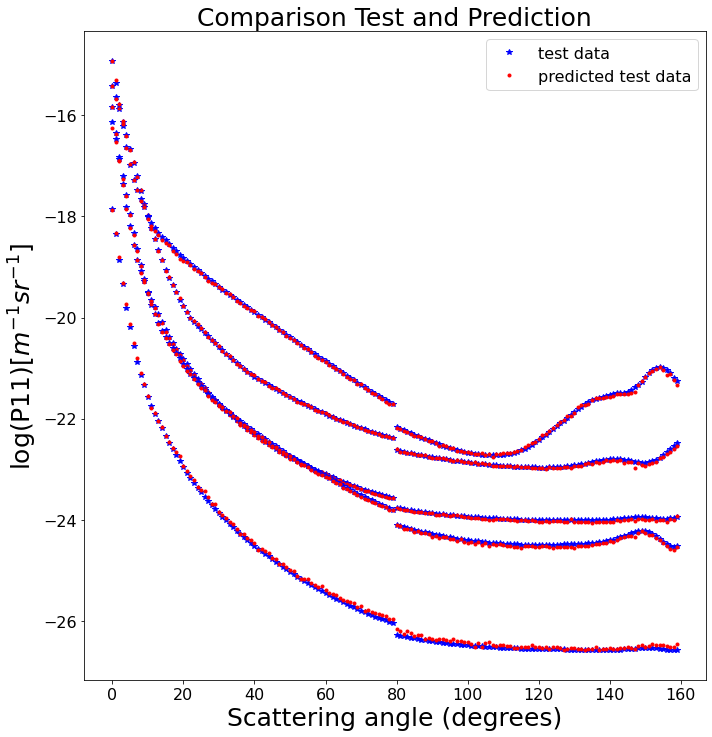

In [49]:
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    ax.plot(np.arange(0,len(P11_532_columns)),qoi_test[P11_532_columns].iloc[index],'b*')
    ax.plot(np.arange(0,len(P11_532_columns)),qoi_pred_fw[P11_532_columns].iloc[index],'r.')
    
    

ax.set_xlabel('Scattering angle (degrees)',fontsize = 25)
ax.set_ylabel('log(P11)[$m^{-1}sr^{-1}$]',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 
ax.set_title( 'Comparison Test and Prediction',fontsize = 25)
ax.legend(['test data', 'predicted test data'], fontsize = 16)
fig.savefig(f'{plot_dir}/phase_data__result_iv.jpg')

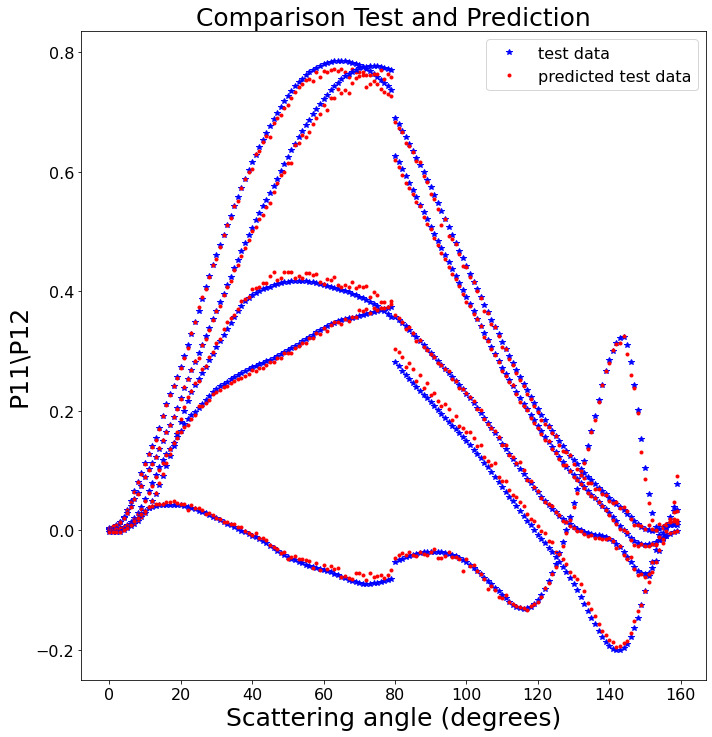

In [50]:
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    ax.plot(np.arange(0,len(P12_532_columns)),qoi_test[P12_532_columns].iloc[index],'b*')
    ax.plot(np.arange(0,len(P12_532_columns)),qoi_pred_fw[P12_532_columns].iloc[index],'r.')
    
    

ax.set_xlabel('Scattering angle (degrees)',fontsize = 25)
ax.set_ylabel('P11\P12',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 
ax.set_title( 'Comparison Test and Prediction',fontsize = 25)
ax.legend(['test data', 'predicted test data'], fontsize = 16)
fig.savefig(f'{plot_dir}/phase_data__result_iv.jpg')

In [51]:
dvar_test.columns

Index(['V_tot', 'R_median', 'GSD', 'n', 'k_532nm'], dtype='object')

# dvar

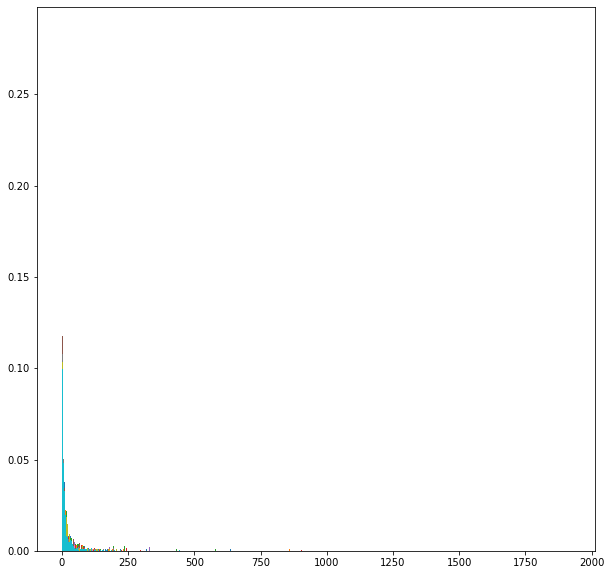

In [52]:
fig, ax = plt.subplots(figsize = (10,10))

x1data = []
x2data = []
y1data = []
y2data = []

for datapoint in presentation_plot_index:
    mu1 = dvar_pred_iv.iloc[datapoint]['R_median']
    sigma1 = dvar_pred_iv.iloc[datapoint]['GSD']
    mu2 = dvar_test.iloc[datapoint]['R_median']
    sigma2 = dvar_test.iloc[datapoint]['GSD']
    Vtot1 = dvar_pred_iv.iloc[datapoint]['V_tot']
    Vtot2 = dvar_test.iloc[datapoint]['V_tot']
    
    
    s1 = np.random.lognormal(mu1, sigma1, 10000)
    s2 = np.random.lognormal(mu2, sigma2, 10000)


    count1, bins1, ignored1 = plt.hist(s1, 10000, density=True, align='mid')
    count2, bins2, ignored2 = plt.hist(s2, 10000, density=True, align='mid')

    x1 = np.linspace(min(bins1), max(bins1), 100000)
    x2 = np.linspace(min(bins2), max(bins2), 100000)

    pdf1 = Vtot1*(np.exp(-(np.log(x1) - mu1)**2 / (2 * sigma1**2)) / (x1 * sigma1 * np.sqrt(2 * np.pi)))
    pdf2 = Vtot2*(np.exp(-(np.log(x2) - mu2)**2 / (2 * sigma2**2)) / (x2 * sigma2 * np.sqrt(2 * np.pi)))

    x1data.append(x1)
    x2data.append(x2)
    y1data.append(pdf1)
    y2data.append(pdf2)


0
1000
2000
5000


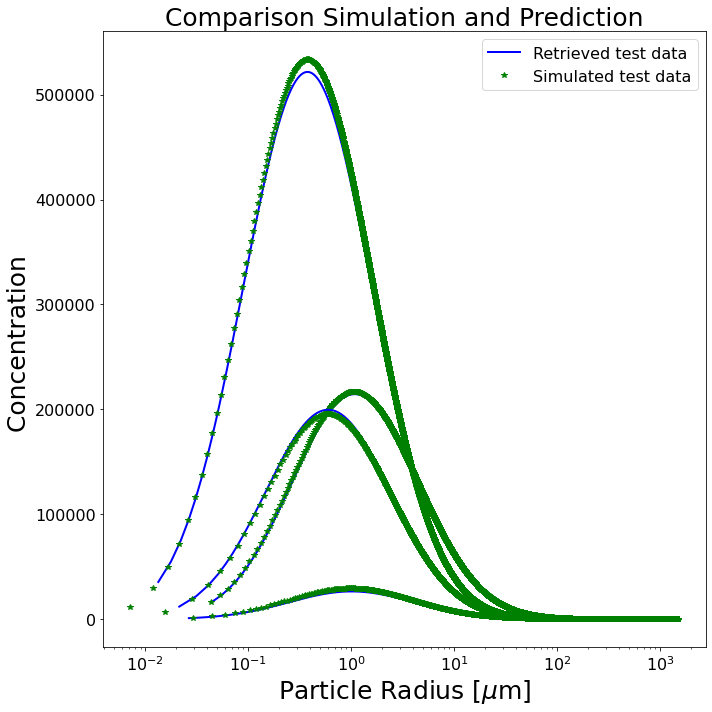

In [53]:
fig, ax = plt.subplots(figsize = (10,10))
for datalen in (0,1,2,3):
    print(presentation_plot_index[datalen])
     
    if datalen == 0:        
        ax.plot(x1data[datalen], y1data[datalen]*1000,'b', linewidth=2,label ='Retrieved test data')
        ax.plot(x2data[datalen], y2data[datalen]*1000, '*g',linewidth=1, label = 'Simulated test data')
    else:
        ax.plot(x1data[datalen], y1data[datalen]*1000,'b', linewidth=2)#,label ='Retrieved test data')
        ax.plot(x2data[datalen], y2data[datalen]*1000, '*g',linewidth=1)#, label = 'Simulated test data')
        
    
ax.legend(['Predicted test data', 'test data'], fontsize = 16)
ax.legend(fontsize = 16)   

ax.set_xlabel('Particle Radius [$\mu$m]',fontsize = 25)
ax.set_ylabel('Concentration ',fontsize = 25)
ax.tick_params(labelsize = 16)    
ax.set_title( 'Comparison Simulation and Prediction',fontsize = 25)
fig.align_labels()

plt.xscale('log')
#plt.yscale('log')
fig.tight_layout() 
fig.savefig(f'{plot_dir}/GSD_GMR_iv.jpg')

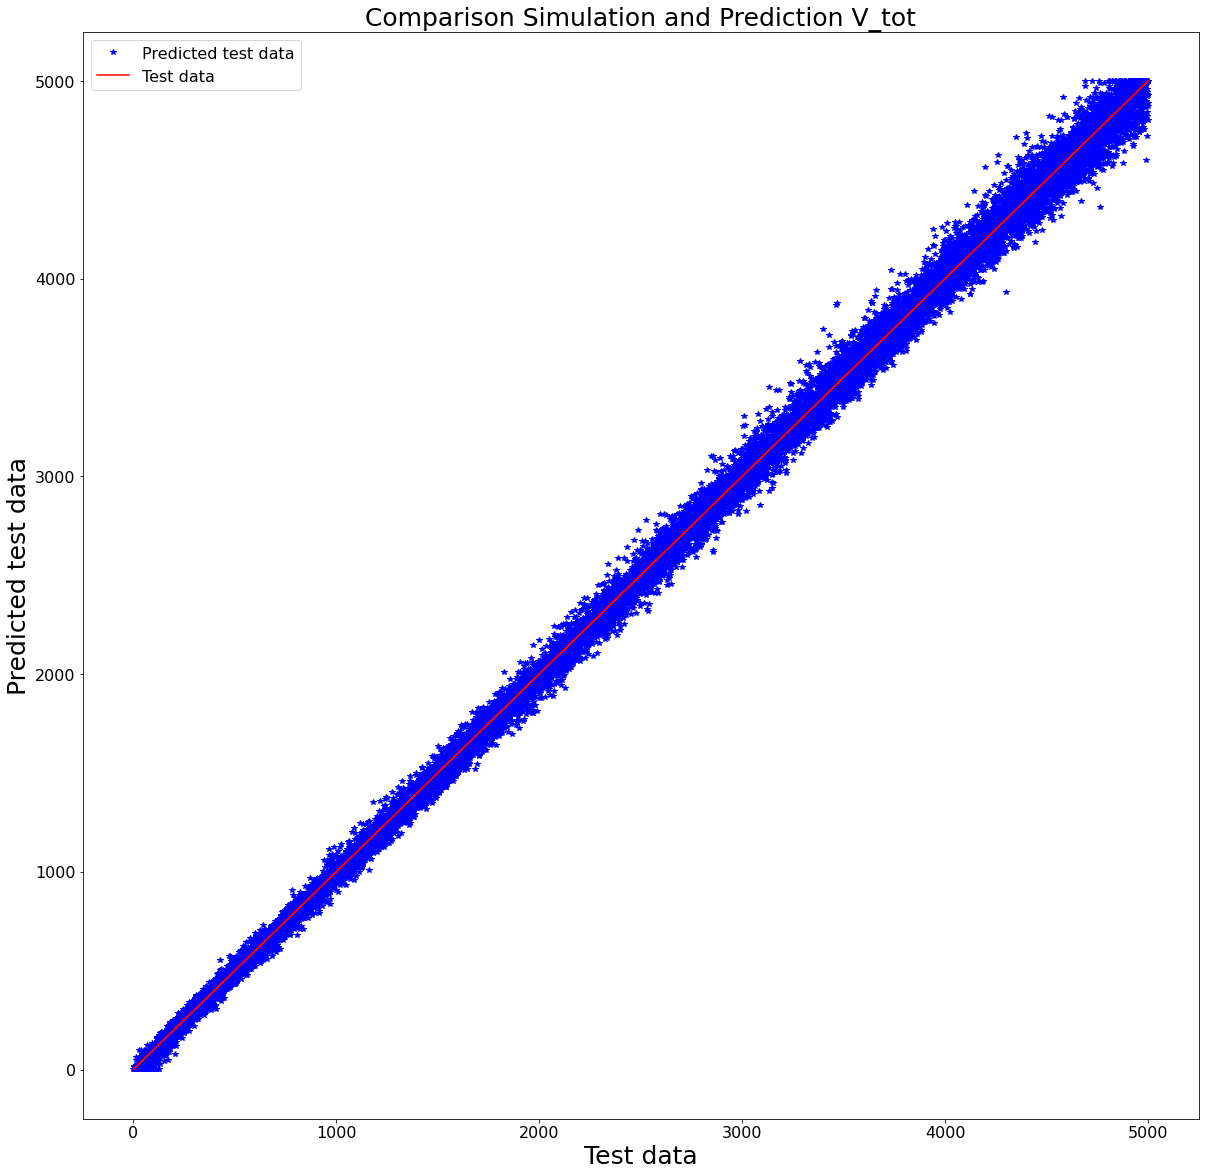

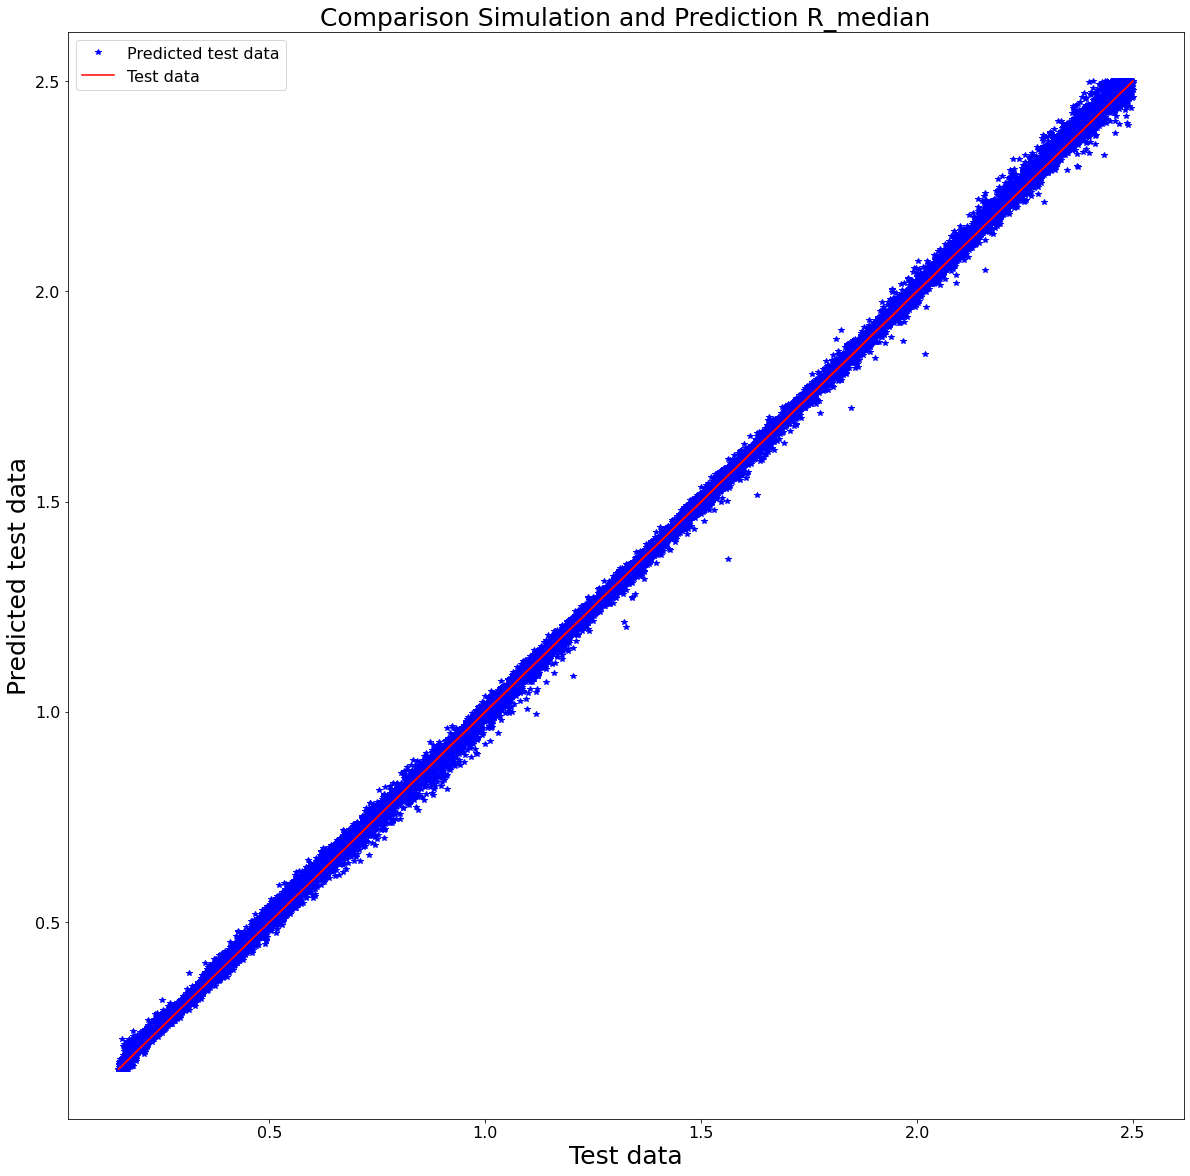

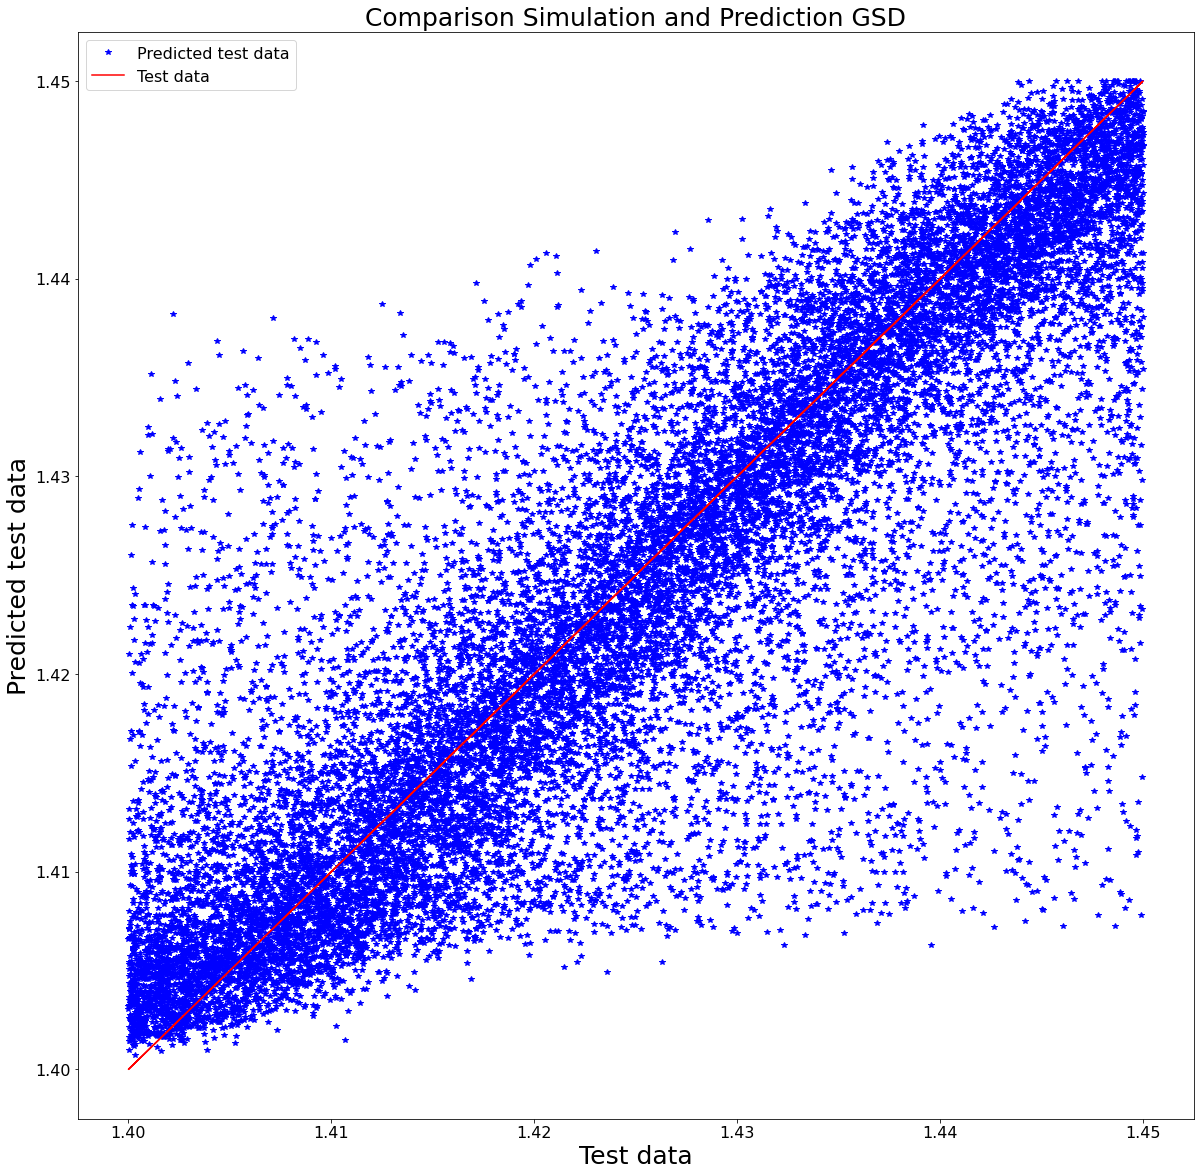

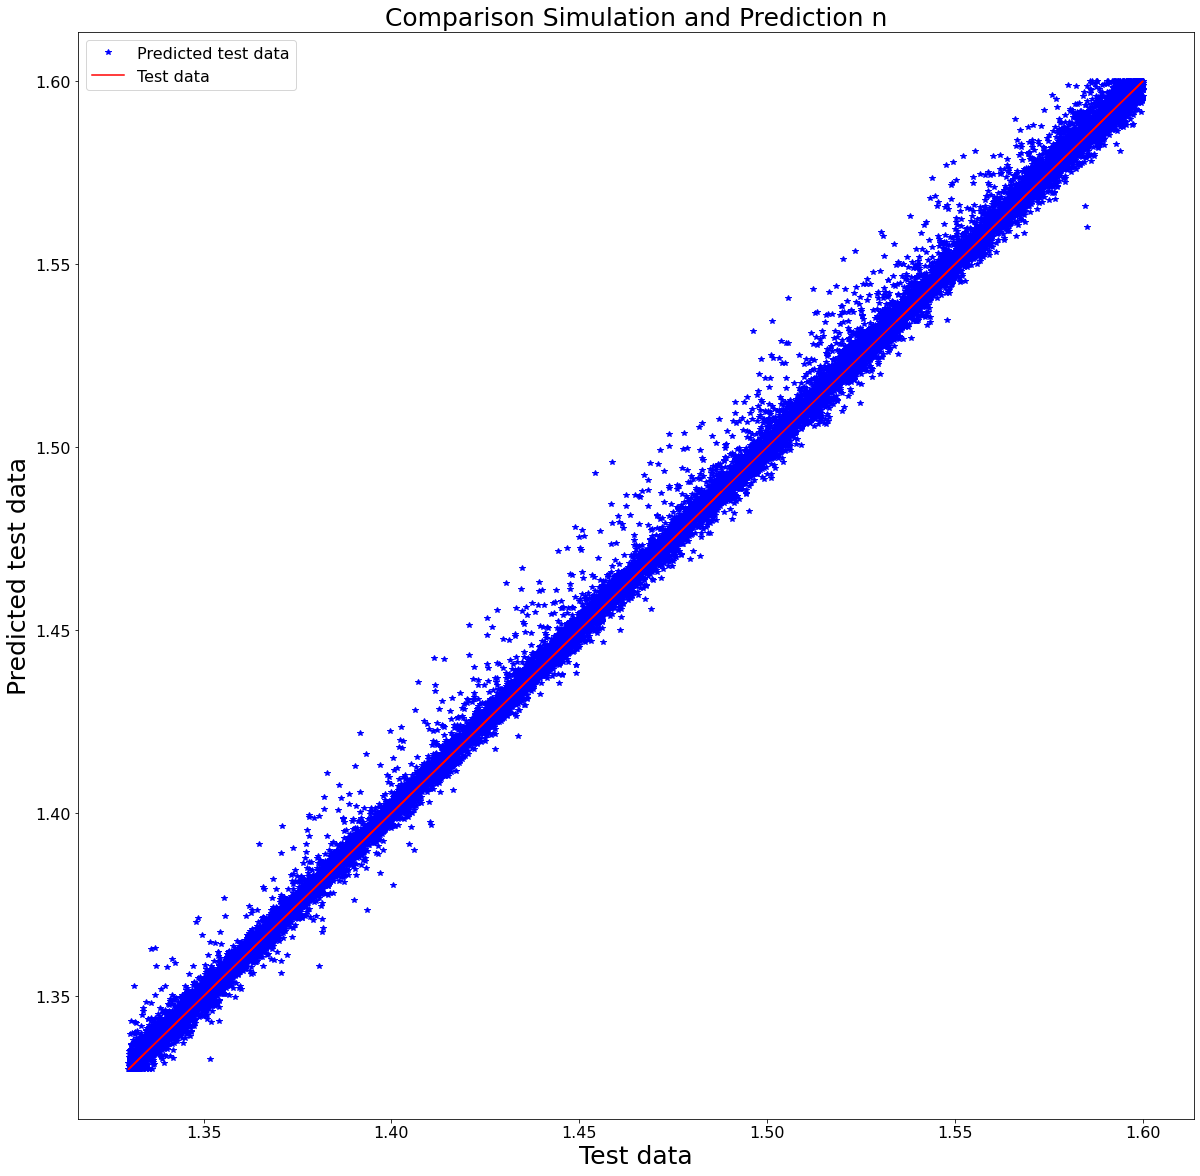

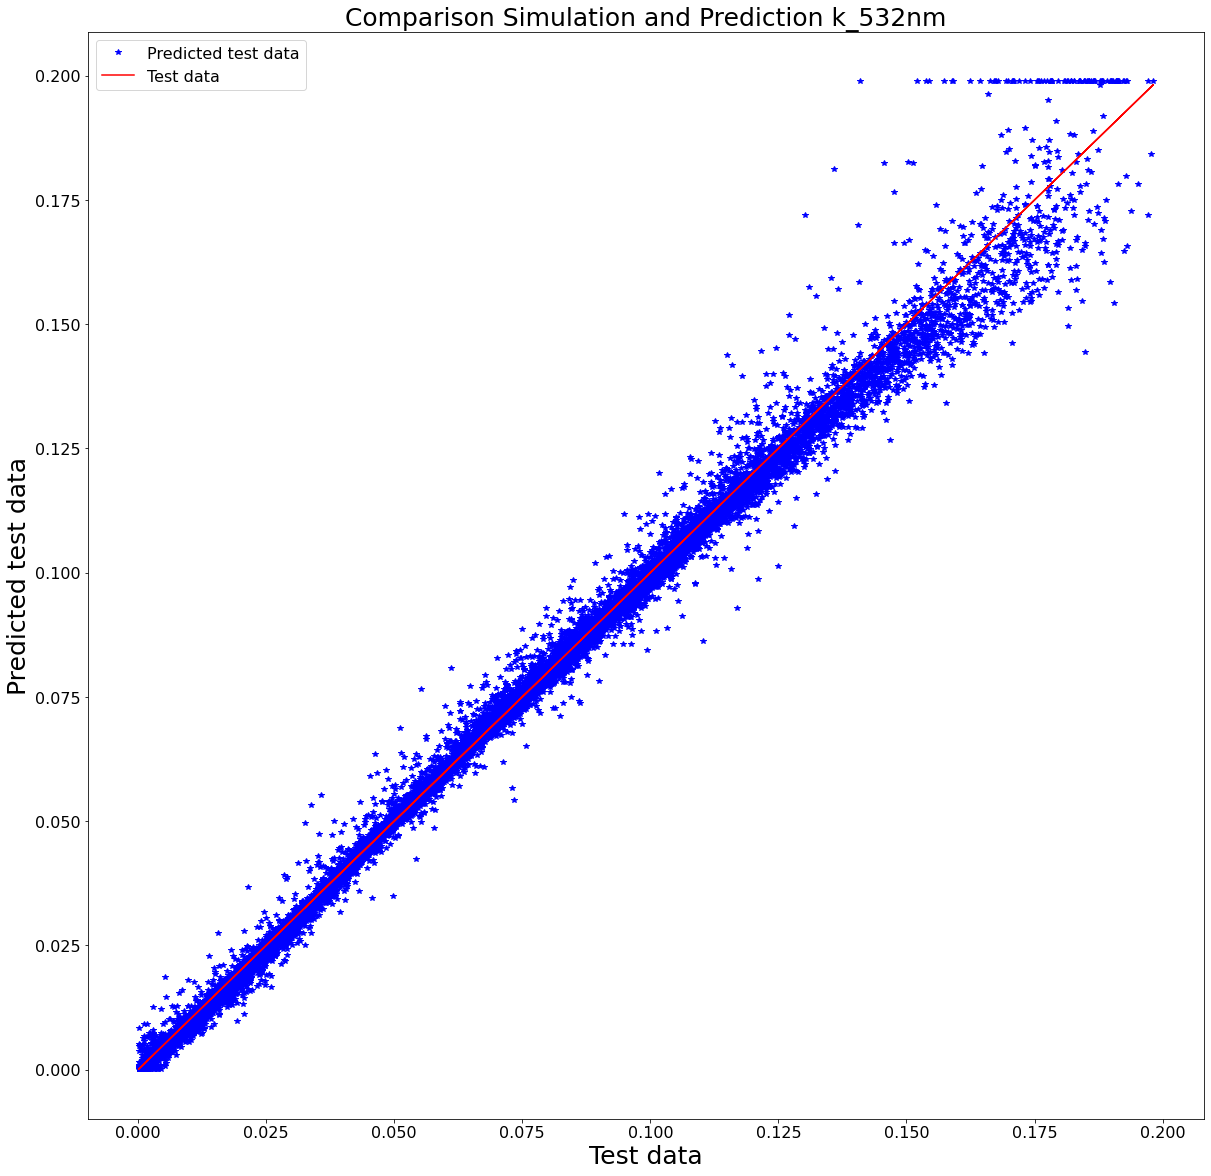

In [54]:
for key in dvar_test.columns:
    fig, ax = plt.subplots(figsize=(20,20))


    ax.plot(dvar_test[key],dvar_pred_iv[key],"b*",label = 'Predicted test data')
    ax.plot(dvar_test[key],dvar_test[key],'r',label = 'Test data')
    ax.set_xlabel('Test data',fontsize = 25)
    ax.set_ylabel('Predicted test data',fontsize = 25)
    ax.tick_params(labelsize = 16)    
    ax.set_title( 'Comparison Simulation and Prediction '+key,fontsize = 25)
    ax.legend(['Predicted test data', 'Test data'], fontsize = 16)
   # ax.legend(fontsize = 16)   

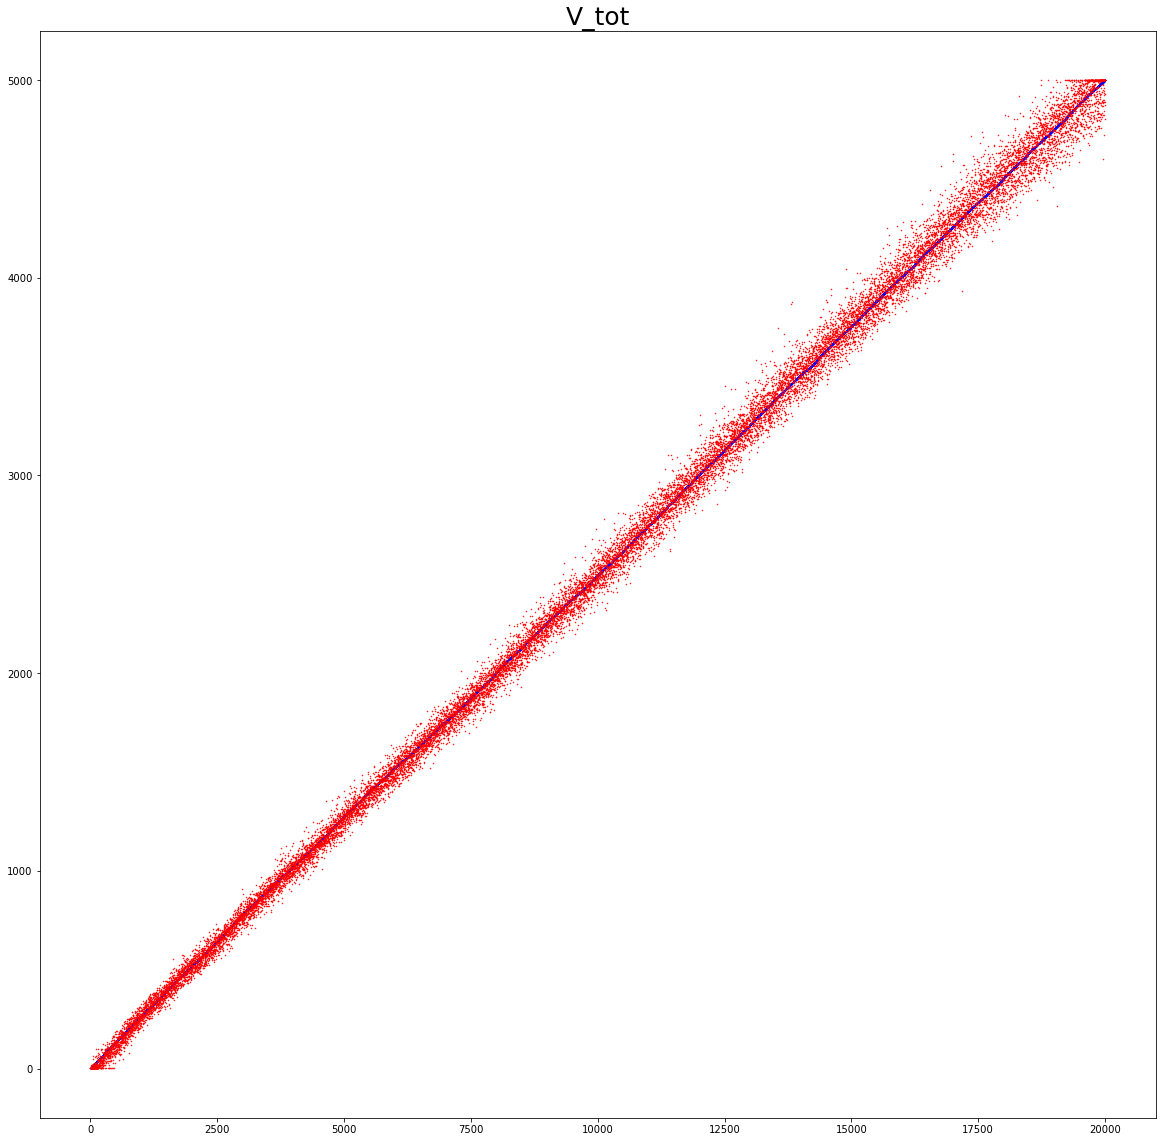

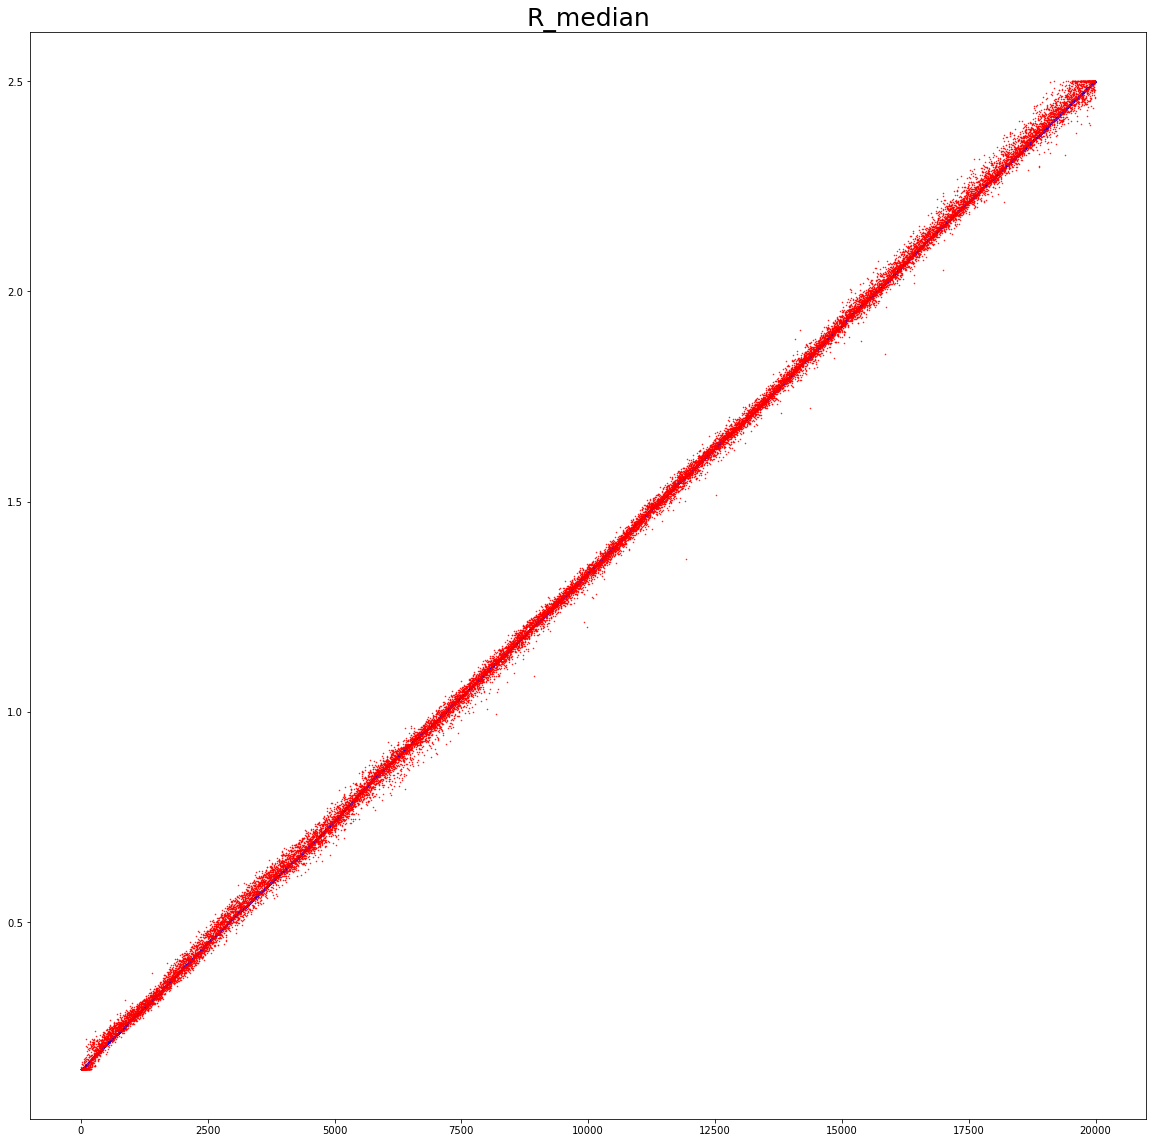

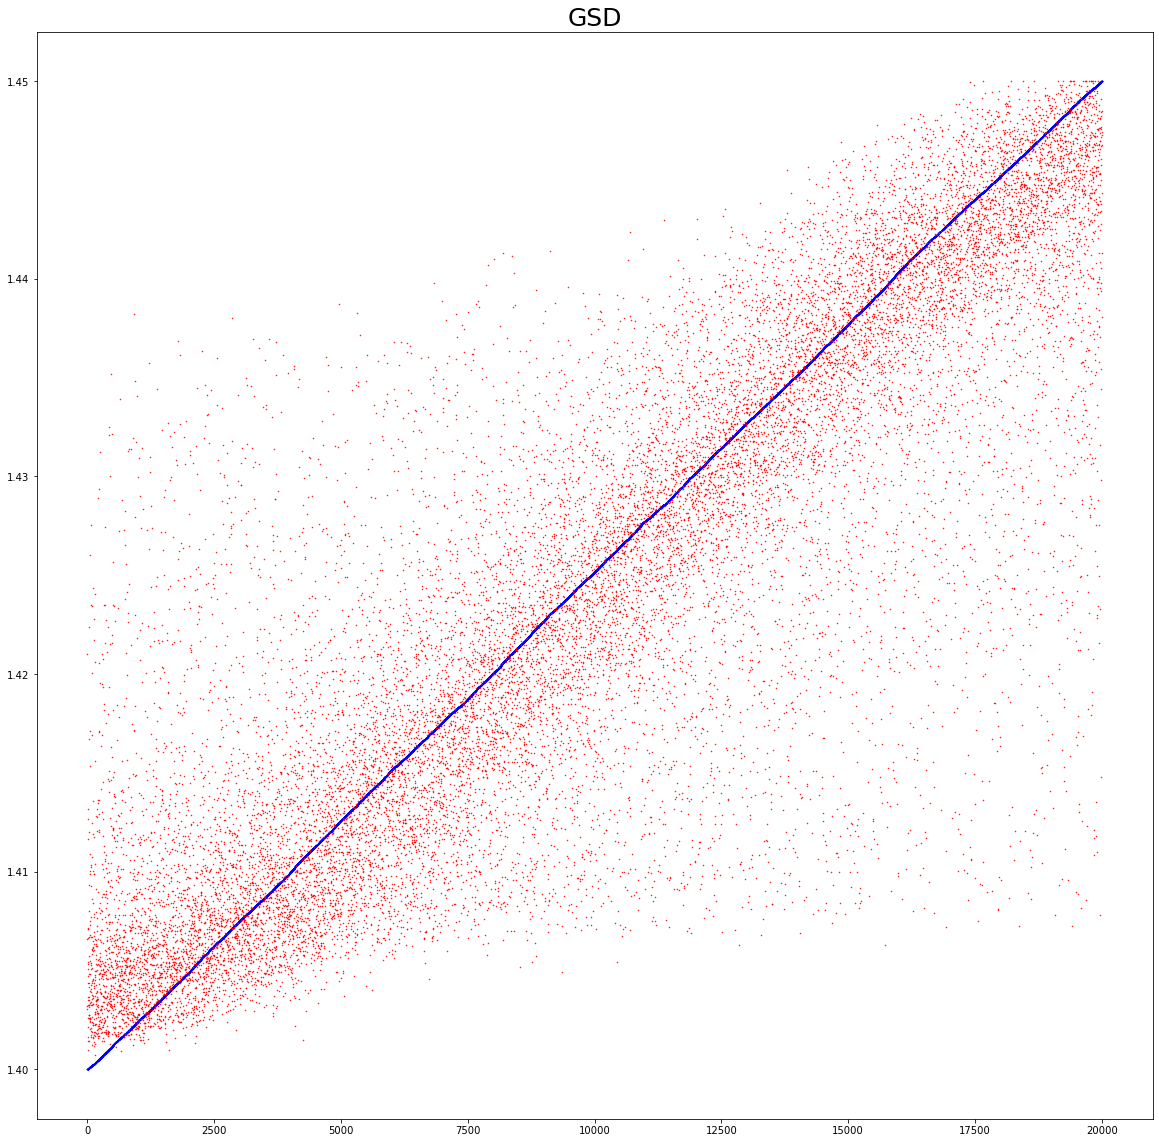

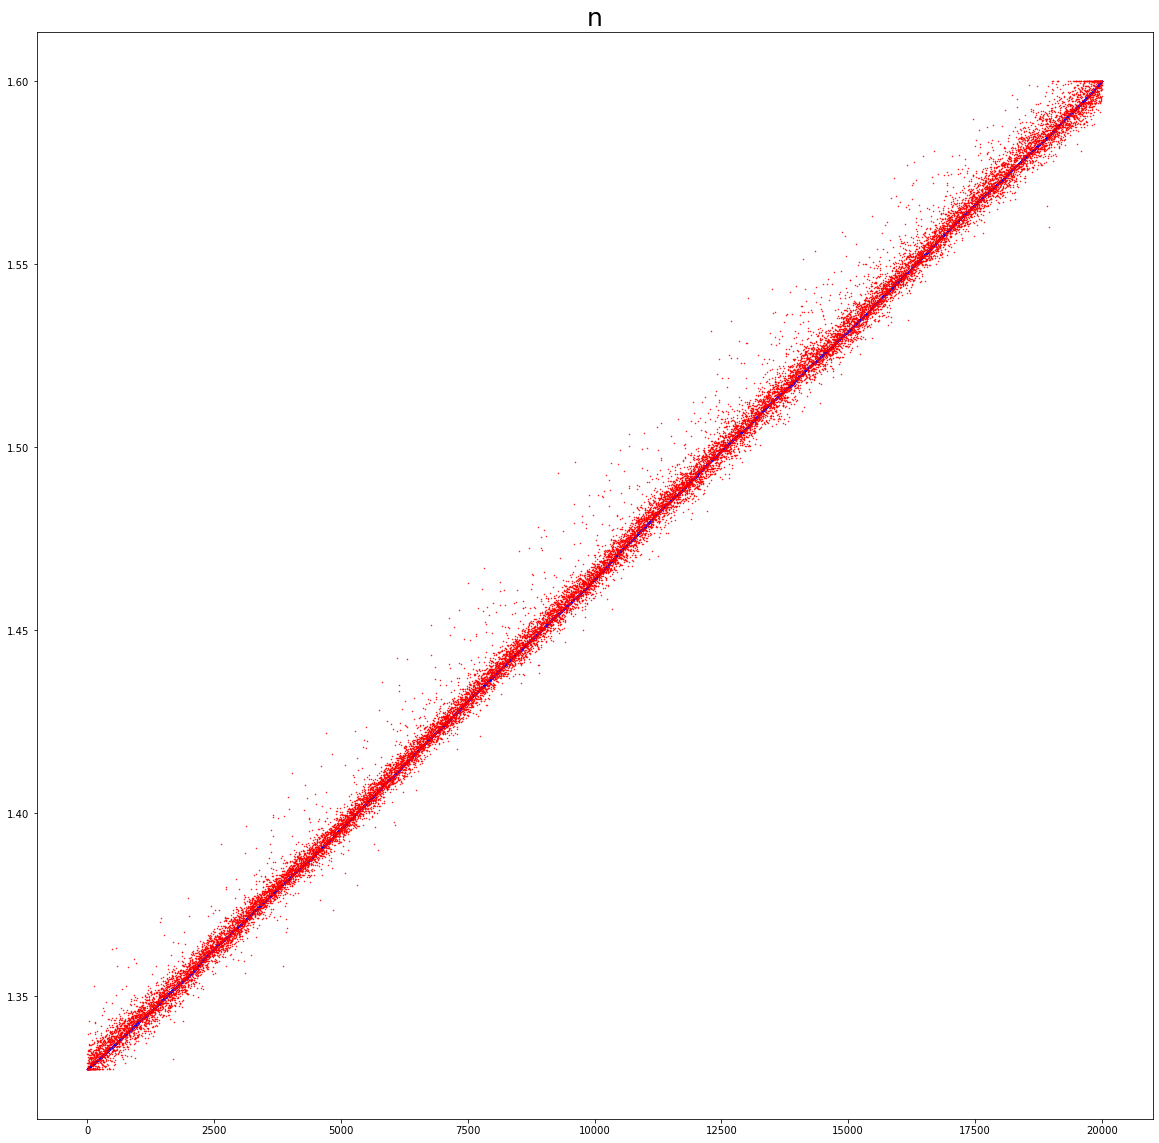

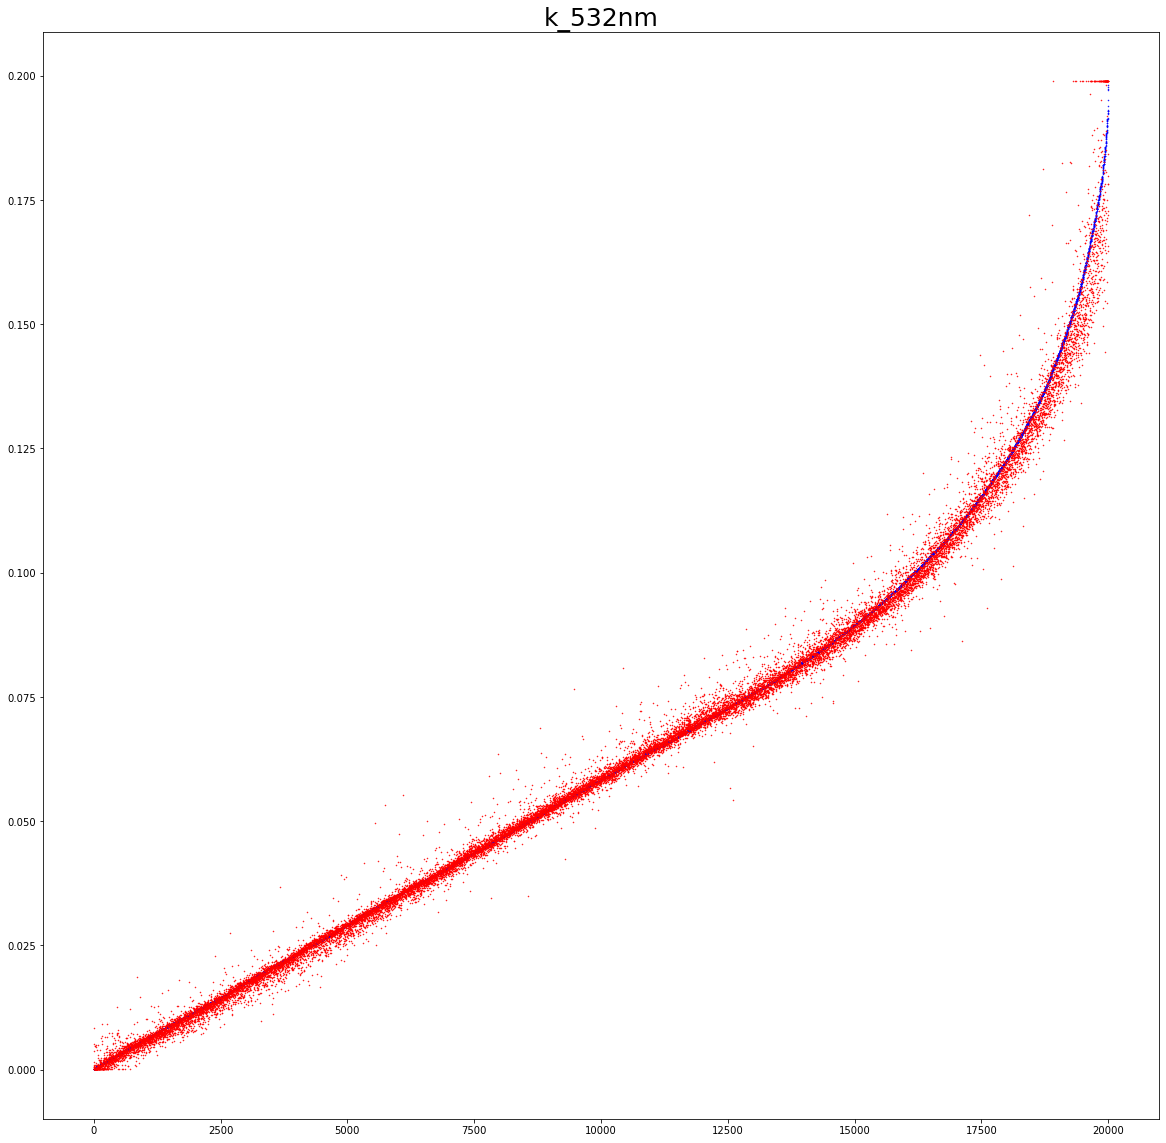

In [55]:
for key in dvar_test.columns:
    dvar_test_help = dvar_test.sort_values(key)
    dvar_pred_iv_df_help = dvar_pred_iv.loc[dvar_test_help.index]

    fig, ax = plt.subplots(figsize=(20, 20))
    ax.plot(np.arange(0,len(dvar_test_help)),dvar_test_help[key],'b.', markersize = '1')
    ax.plot(np.arange(0,len(dvar_pred_iv_df_help)),dvar_pred_iv_df_help[key],'r.', markersize = '1')
    ax.set_title(key, fontsize = 25)
    

# Mean absolute error

In [56]:
MAE_all_dvar = []
for col in dvar_test.keys():
    MAE = mean_absolute_error(dvar_test[col],dvar_pred_iv[col])
    col_mean = dvar_test[col].mean()
    col_p = MAE / col_mean *100
    MAE_all_dvar.append(col_p)
    print(col,'***',MAE,'***', col_mean,'***',col_p)
MAE_all_dvar = np.array(MAE_all_dvar)

V_tot *** 47.40069496407827 *** 2509.2233125206417 *** 1.8890584479889068
R_median *** 0.012636722103963627 *** 1.3304994005997062 *** 0.9497728520785339
GSD *** 0.005234035688828421 *** 1.4251207279214313 *** 0.36726963451457006
n *** 0.002489954071216831 *** 1.4643221701464175 *** 0.1700414104204856
k_532nm *** 0.001678185235468383 *** 0.06318201588428435 *** 2.6561122053179194


In [57]:
MAE_all_dvar.min()

0.1700414104204856

In [58]:
MAE_all_dvar.max()

2.6561122053179194

In [59]:
MAE_all_p = []
for col in qoi_test.keys():
    MAE = mean_absolute_error(qoi_test[col],qoi_pred_fw[col])
    col_mean = qoi_test[col].mean()
    col_p = MAE / col_mean *100
    MAE_all_p.append(col_p)
    print(col,'***',MAE,'***', col_mean,'***',col_p)
MAE_all_p = np.array(MAE_all_p)

P11_0.532_5 *** 0.0365254372497083 *** -15.737315936702773 *** -0.23209445242516352
P11_0.532_6 *** 0.0382611835824378 *** -16.028800359914023 *** -0.2387027271119061
P11_0.532_7 *** 0.03409473562777031 *** -16.327531387209337 *** -0.20881745573908037
P11_0.532_8 *** 0.03882518266135956 *** -16.622693007332145 *** -0.23356734461879347
P11_0.532_9 *** 0.03455376487572089 *** -16.90855115775083 *** -0.20435674560964115
P11_0.532_10 *** 0.031855720474808405 *** -17.165821403672762 *** -0.1855764412648067
P11_0.532_11 *** 0.03762008873468809 *** -17.41793536839621 *** -0.21598477626083895
P11_0.532_12 *** 0.04118256498186178 *** -17.640659230198448 *** -0.23345252830099875
P11_0.532_13 *** 0.047690587428291985 *** -17.843089390351185 *** -0.26727763553144057
P11_0.532_14 *** 0.033445476577566816 *** -18.026383616920224 *** -0.18553625224181775
P11_0.532_15 *** 0.04131358660629366 *** -18.207672561796468 *** -0.22690207365096332
P11_0.532_16 *** 0.03851162858487649 *** -18.365767538853135 *

P11_0.532_115 *** 0.03304984839251987 *** -22.902343406472262 *** -0.14430771474319914
P11_0.532_116 *** 0.031018842203709426 *** -22.91347697331484 *** -0.1353737900181371
P11_0.532_117 *** 0.03319742176173743 *** -22.92390349826462 *** -0.14481574555681814
P11_0.532_118 *** 0.03607334746663229 *** -22.93358499401228 *** -0.15729484716868586
P11_0.532_119 *** 0.02959669853737884 *** -22.94248401070387 *** -0.12900389741394364
P11_0.532_120 *** 0.035841375090485475 *** -22.950566210246336 *** -0.15616771613453267
P11_0.532_121 *** 0.0339672023899813 *** -22.95780377072096 *** -0.14795492952727946
P11_0.532_122 *** 0.03493881395858453 *** -22.964179357962983 *** -0.15214484007445825
P11_0.532_123 *** 0.03324178154962616 *** -22.969687800735947 *** -0.14472021491106685
P11_0.532_124 *** 0.03264109315700478 *** -22.97433510097398 *** -0.14207633436852318
P11_0.532_125 *** 0.03146292748846973 *** -22.978136619100926 *** -0.13692549578765972
P11_0.532_126 *** 0.029854965088262624 *** -22.98

P12_0.532_116 *** 0.006937187830545056 *** 0.109734190912965 *** 6.321810707154385
P12_0.532_117 *** 0.00699661947084829 *** 0.10400383981585 *** 6.727270342360973
P12_0.532_118 *** 0.0071832335067995474 *** 0.098112060391275 *** 7.3214582164032755
P12_0.532_119 *** 0.006385323747730703 *** 0.09206466254303 *** 6.935694512263349
P12_0.532_120 *** 0.006809080761643014 *** 0.08587869775354 *** 7.928719158252882
P12_0.532_121 *** 0.006520714768708896 *** 0.07958202785270001 *** 8.193702704809457
P12_0.532_122 *** 0.0065871146710152675 *** 0.07321000644474501 *** 8.9975605670611
P12_0.532_123 *** 0.006276037326083766 *** 0.06680401934016 *** 9.394700181327046
P12_0.532_124 *** 0.006688416881994279 *** 0.060404565843435 *** 11.072700860610857
P12_0.532_125 *** 0.0066059069313233595 *** 0.05404819078895 *** 12.222253575736561
P12_0.532_126 *** 0.0061981916673420475 *** 0.047763676544199996 *** 12.976789300560451
P12_0.532_127 *** 0.006269596635901864 *** 0.04156973645215 *** 15.0821178361779

In [60]:
MAE_all_p.min()

-126.41498496157146

In [61]:
MAE_all_p.max()

617.5415637419911

# Root mean squared error

In [62]:
MAE_dvar_p = []
for col in dvar_test.keys():
    MAE = np.sqrt(mean_squared_error(dvar_test[col],dvar_pred_iv[col]))
    col_mean = dvar_test[col].mean()
    col_p = MAE / col_mean *100
    MAE_dvar_p.append(col_p)
    print(col,'***',MAE,'***', col_mean,'***',col_p)
MAE_dvar_p = pd.DataFrame(MAE_dvar_p,index = dvar_test.keys()).T

V_tot *** 63.849693170038236 *** 2509.2233125206417 *** 2.5445998708619517
R_median *** 0.017163863773131834 *** 1.3304994005997062 *** 1.2900316802394225
GSD *** 0.007839744907481397 *** 1.4251207279214313 *** 0.5501109312272674
n *** 0.0038928565823893374 *** 1.4643221701464175 *** 0.26584700155158414
k_532nm *** 0.0033589572499535267 *** 0.06318201588428435 *** 5.316318580441212


In [63]:
MAE_dvar_p

V_tot  R_median       GSD         n   k_532nm
0  2.5446  1.290032  0.550111  0.265847  5.316319

In [64]:
MAE_all_p = []
for col in qoi_test.keys():
    MAE = np.sqrt(abs(mean_squared_error(qoi_test[col],qoi_pred_fw[col])))
    col_mean = qoi_test[col].mean()
    col_p = MAE / col_mean *100
    MAE_all_p.append(col_p)
    print(col,'***',MAE,'***', col_mean,'***',col_p)
MAE_all_p = np.array(MAE_all_p)
print(MAE_all_p.min())
print(MAE_all_p.max())

P11_0.532_5 *** 0.05930964939737498 *** -15.737315936702773 *** -0.37687271219517327
P11_0.532_6 *** 0.062549416990824 *** -16.028800359914023 *** -0.3902314308390295
P11_0.532_7 *** 0.05678378196071417 *** -16.327531387209337 *** -0.3477793465165068
P11_0.532_8 *** 0.06359657732570718 *** -16.622693007332145 *** -0.3825888939755743
P11_0.532_9 *** 0.05695515918646418 *** -16.90855115775083 *** -0.3368423388561953
P11_0.532_10 *** 0.05399822509848759 *** -17.165821403672762 *** -0.3145682564711657
P11_0.532_11 *** 0.06210222205960469 *** -17.41793536839621 *** -0.35654181018655867
P11_0.532_12 *** 0.06697341294178312 *** -17.640659230198448 *** -0.3796536856578103
P11_0.532_13 *** 0.07263015519824313 *** -17.843089390351185 *** -0.40704921445676645
P11_0.532_14 *** 0.05755279459867227 *** -18.026383616920224 *** -0.3192697760223582
P11_0.532_15 *** 0.06555556123971033 *** -18.207672561796468 *** -0.36004360808453745
P11_0.532_16 *** 0.061582373830791154 *** -18.365767538853135 *** -0.3

P11_0.532_129 *** 0.05627907582341411 *** -22.98533330457044 *** -0.24484776913034142
P11_0.532_130 *** 0.05877461418464699 *** -22.985215607040793 *** -0.2557061686497439
P11_0.532_131 *** 0.06368260869710102 *** -22.984322134702136 *** -0.27706977096771496
P11_0.532_132 *** 0.052376619096252484 *** -22.982606453273405 *** -0.2278967757758063
P11_0.532_133 *** 0.05536169611848167 *** -22.97998647565415 *** -0.2409126575297766
P11_0.532_134 *** 0.05664998080644879 *** -22.97633849296928 *** -0.2465579135848107
P11_0.532_135 *** 0.055116873105181145 *** -22.971514905756024 *** -0.2399357348930017
P11_0.532_136 *** 0.058590105903179764 *** -22.965379210990797 *** -0.2551236161392869
P11_0.532_137 *** 0.05841738068058601 *** -22.95786172497797 *** -0.25445479801382537
P11_0.532_138 *** 0.0559798651189276 *** -22.949010108886064 *** -0.24393150228842198
P11_0.532_139 *** 0.06012261374386931 *** -22.93900848212744 *** -0.26209770047695335
P11_0.532_140 *** 0.06133494931356251 *** -22.928142

P12_0.532_100 *** 0.012207802955197434 *** 0.1884087778993 *** 6.479423671927968
P12_0.532_101 *** 0.011368432917547619 *** 0.18405857273961002 *** 6.176529975395758
P12_0.532_102 *** 0.011101744144731541 *** 0.17960225029855 *** 6.181294569682332
P12_0.532_103 *** 0.010629716654961187 *** 0.1750510444352 *** 6.072352603926377
P12_0.532_104 *** 0.010319819206595304 *** 0.1704160325092 *** 6.055662166667437
P12_0.532_105 *** 0.011306711250621094 *** 0.16570837445818 *** 6.823258804867812
P12_0.532_106 *** 0.010412725783067628 *** 0.1609388262953 *** 6.469989885449857
P12_0.532_107 *** 0.010110780860748902 *** 0.15611562333374998 *** 6.476469583786426
P12_0.532_108 *** 0.011052529626581714 *** 0.15124400723185003 *** 7.307747149041549
P12_0.532_109 *** 0.012057326844770299 *** 0.1463251452304 *** 8.240092176765058
P12_0.532_110 *** 0.010345642081822305 *** 0.14135557031775 *** 7.318878243401776
P12_0.532_111 *** 0.010290621010690719 *** 0.136326628695535 *** 7.548503993063066
P12_0.532_1

# explained variance score

In [65]:
explained_variance_score

<function sklearn.metrics._regression.explained_variance_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

In [66]:
EVS_dvar = []
for col in dvar_test.keys():
    EVS = explained_variance_score(dvar_test[col],dvar_pred_iv[col])
    EVS_dvar.append(EVS)
EVS_dvar = pd.DataFrame(EVS_dvar,index = dvar_test.keys()).T
EVS_dvar

V_tot  R_median       GSD         n   k_532nm
0  0.99803  0.999395  0.714762  0.997727  0.993668

In [67]:
EVS_all = []
for col in qoi_test.keys():
    EVS = explained_variance_score(qoi_test[col],qoi_pred_fw[col])
    print(col,'***',EVS)
    EVS_all.append(EVS)


P11_0.532_5 *** 0.9966600892642735
P11_0.532_6 *** 0.9966540295503292
P11_0.532_7 *** 0.9975913417250831
P11_0.532_8 *** 0.9974942872807471
P11_0.532_9 *** 0.9982038802786231
P11_0.532_10 *** 0.9985215057218791
P11_0.532_11 *** 0.9982673326741764
P11_0.532_12 *** 0.9981679265669102
P11_0.532_13 *** 0.998002753720889
P11_0.532_14 *** 0.9987207552543279
P11_0.532_15 *** 0.9984167439357186
P11_0.532_16 *** 0.9986838507209358
P11_0.532_17 *** 0.9988217882483359
P11_0.532_18 *** 0.998865344904413
P11_0.532_19 *** 0.9986503549881419
P11_0.532_20 *** 0.9982587019974551
P11_0.532_21 *** 0.9983417503547218
P11_0.532_22 *** 0.9989608414002559
P11_0.532_23 *** 0.9985742656614838
P11_0.532_24 *** 0.997537221314423
P11_0.532_25 *** 0.9984832426632628
P11_0.532_26 *** 0.9987373568160866
P11_0.532_27 *** 0.9986613475416803
P11_0.532_28 *** 0.9987428303318989
P11_0.532_29 *** 0.9989467868786202
P11_0.532_30 *** 0.9987543350698379
P11_0.532_31 *** 0.9987047707856475
P11_0.532_32 *** 0.9985125982532078


P12_0.532_153 *** 0.9981648015438515
P12_0.532_154 *** 0.998586509226898
P12_0.532_155 *** 0.9984062009553052
P12_0.532_156 *** 0.9983759435386383
P12_0.532_157 *** 0.9980979384590393
P12_0.532_158 *** 0.9979420600692668
P12_0.532_159 *** 0.9980693010997296
P12_0.532_160 *** 0.9981779384816166
P12_0.532_161 *** 0.9981358810532055
P12_0.532_162 *** 0.9978181924379007
P12_0.532_163 *** 0.9975819721372645
P12_0.532_164 *** 0.9975904029475426
P12_0.532_165 *** 0.9978336902603105
P12_0.532_166 *** 0.9978380382087849
P12_0.532_167 *** 0.996998519263369
P12_0.532_168 *** 0.9969434207802599
P12_0.532_169 *** 0.9959592676154031
P12_0.532_170 *** 0.9963921285755657
P12_0.532_171 *** 0.9954540785651259
P12_0.532_172 *** 0.9956649036088717
P12_0.532_173 *** 0.9944867334750926
P12_0.532_174 *** 0.992096390344998
P12_0.532_175 *** 0.9928687484609376


In [68]:
EVS_all_df = pd.DataFrame(EVS_all).T
EVS_all_df.columns = qoi_test.columns
EVS_all_df

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0      0.99666     0.996654     0.997591     0.997494     0.998204   

   P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  ...  \
0      0.998522      0.998267      0.998168      0.998003      0.998721  ...   

   P12_0.532_166  P12_0.532_167  P12_0.532_168  P12_0.532_169  P12_0.532_170  \
0       0.997838       0.996999       0.996943       0.995959       0.996392   

   P12_0.532_171  P12_0.532_172  P12_0.532_173  P12_0.532_174  P12_0.532_175  
0       0.995454       0.995665       0.994487       0.992096       0.992869  

[1 rows x 320 columns]

In [69]:
EVS_all_df.sort_values(by=EVS_all_df.index[0], axis = 1,ascending=True)


P12_0.532_174  P12_0.532_175  P12_0.532_131  P12_0.532_173  P12_0.532_30  \
0       0.992096       0.992869       0.993492       0.994487      0.994981   

   P12_0.532_6  P12_0.532_171  P12_0.532_172  P12_0.532_9  P12_0.532_7  ...  \
0     0.994984       0.995454       0.995665     0.995811     0.995869  ...   

   P11_0.532_78  P11_0.532_63  P11_0.532_69  P11_0.532_57  P11_0.532_62  \
0      0.998971      0.998976      0.998983      0.998989      0.999003   

   P11_0.532_61  P11_0.532_70  P11_0.532_58  P11_0.532_74  P11_0.532_55  
0      0.999004      0.999012      0.999014       0.99902      0.999044  

[1 rows x 320 columns]

# plot correlation test data and predicted test data

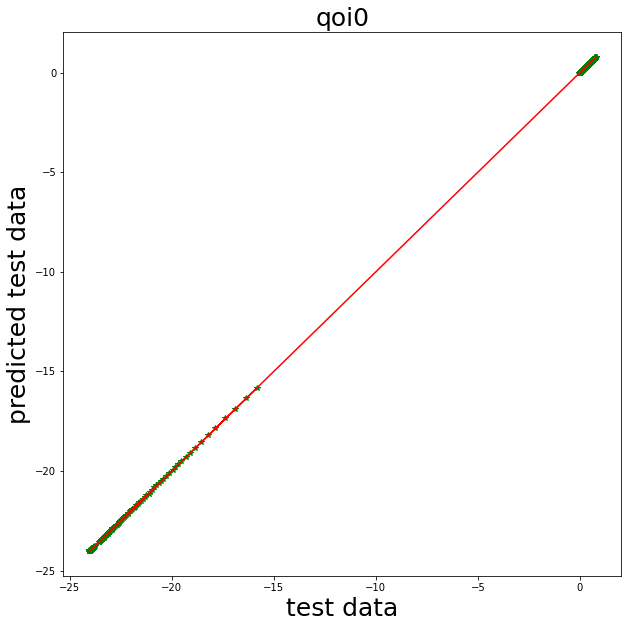

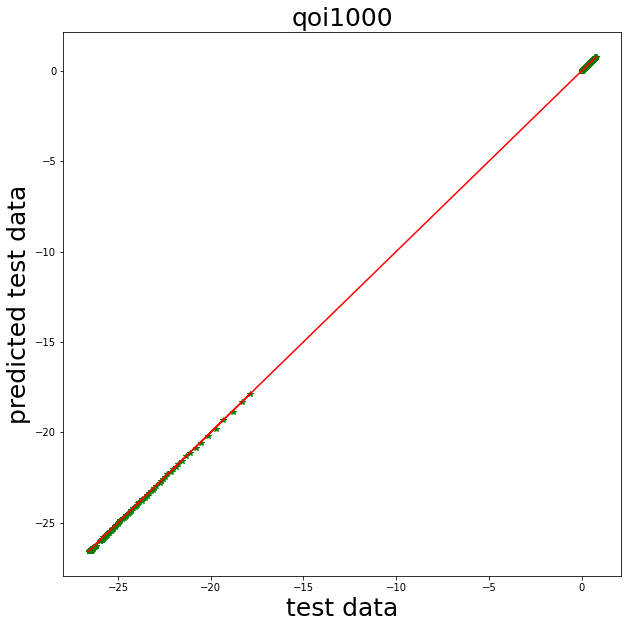

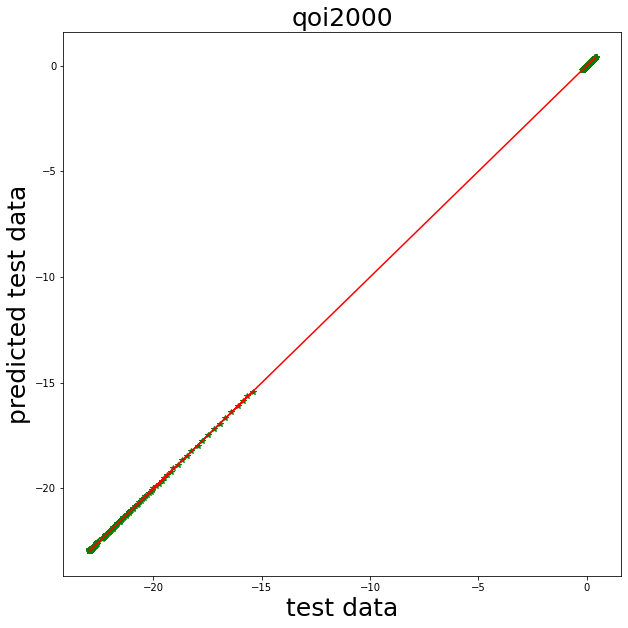

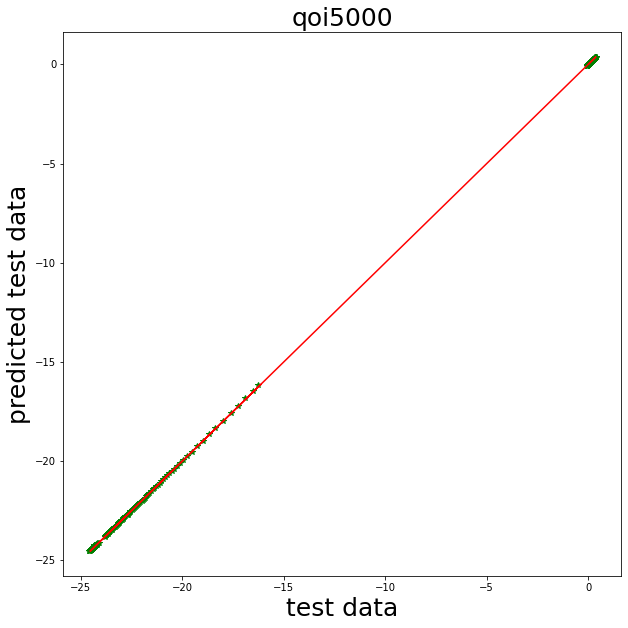

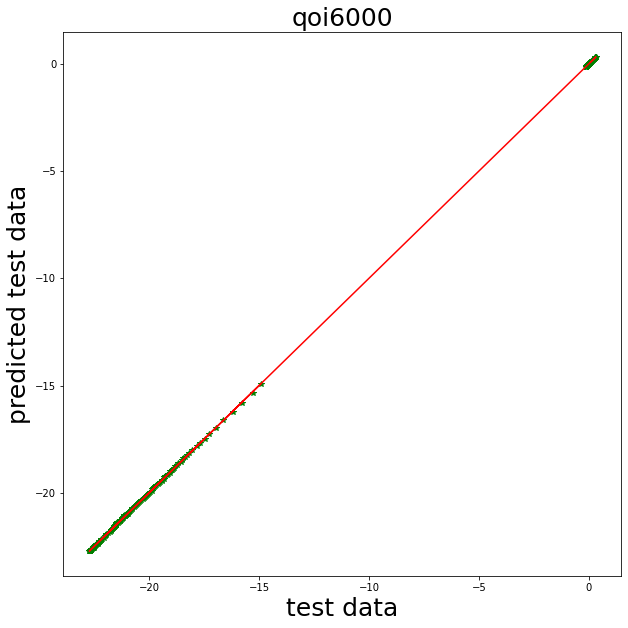

In [70]:
for index in presentation_plot_index:
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(qoi_pred_fw.iloc[index],qoi_test.iloc[index],'g*')
    ax.plot(qoi_test.iloc[index],qoi_test.iloc[index],'r')
    ax.set_title('qoi'+str(index), fontsize = 25)
    ax.set_xlabel('test data',fontsize = 25)
    ax.set_ylabel('predicted test data',fontsize = 25)

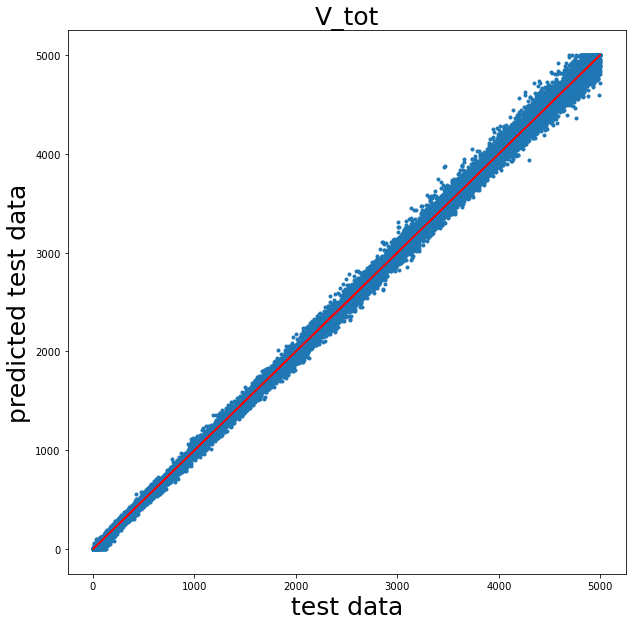

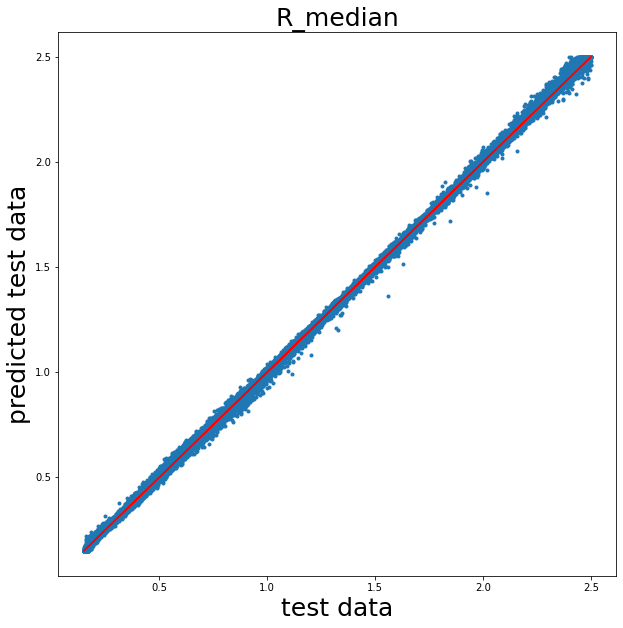

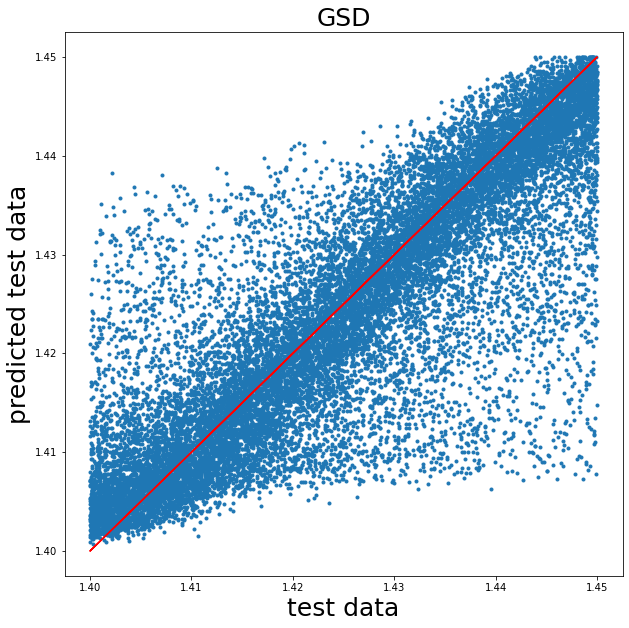

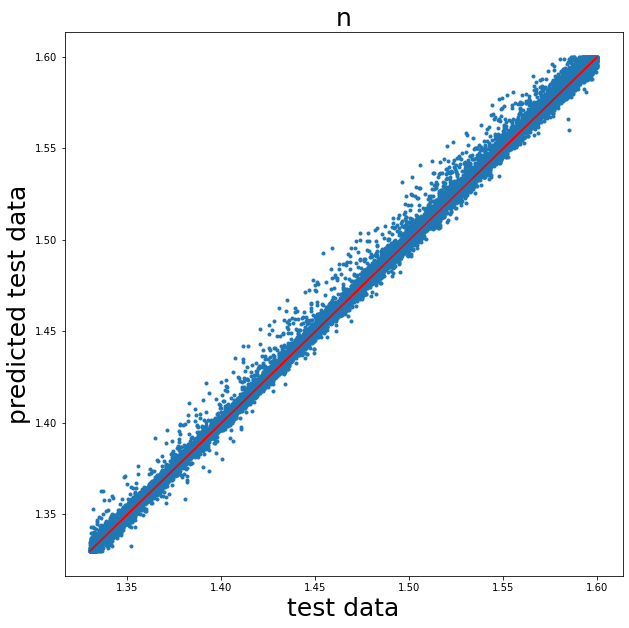

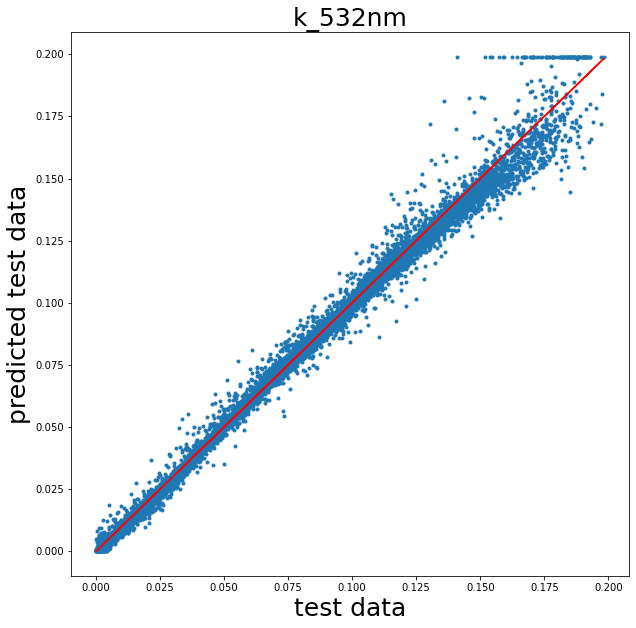

In [71]:
for key in dvar_columns:
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(dvar_test[key],dvar_pred_iv[key],".")
    ax.plot(dvar_test[key],dvar_test[key],"r")
    ax.set_title(key, fontsize = 25)
    ax.set_xlabel('test data',fontsize = 25)
    ax.set_ylabel('predicted test data',fontsize = 25)

# plot r2 for forward and inverse model

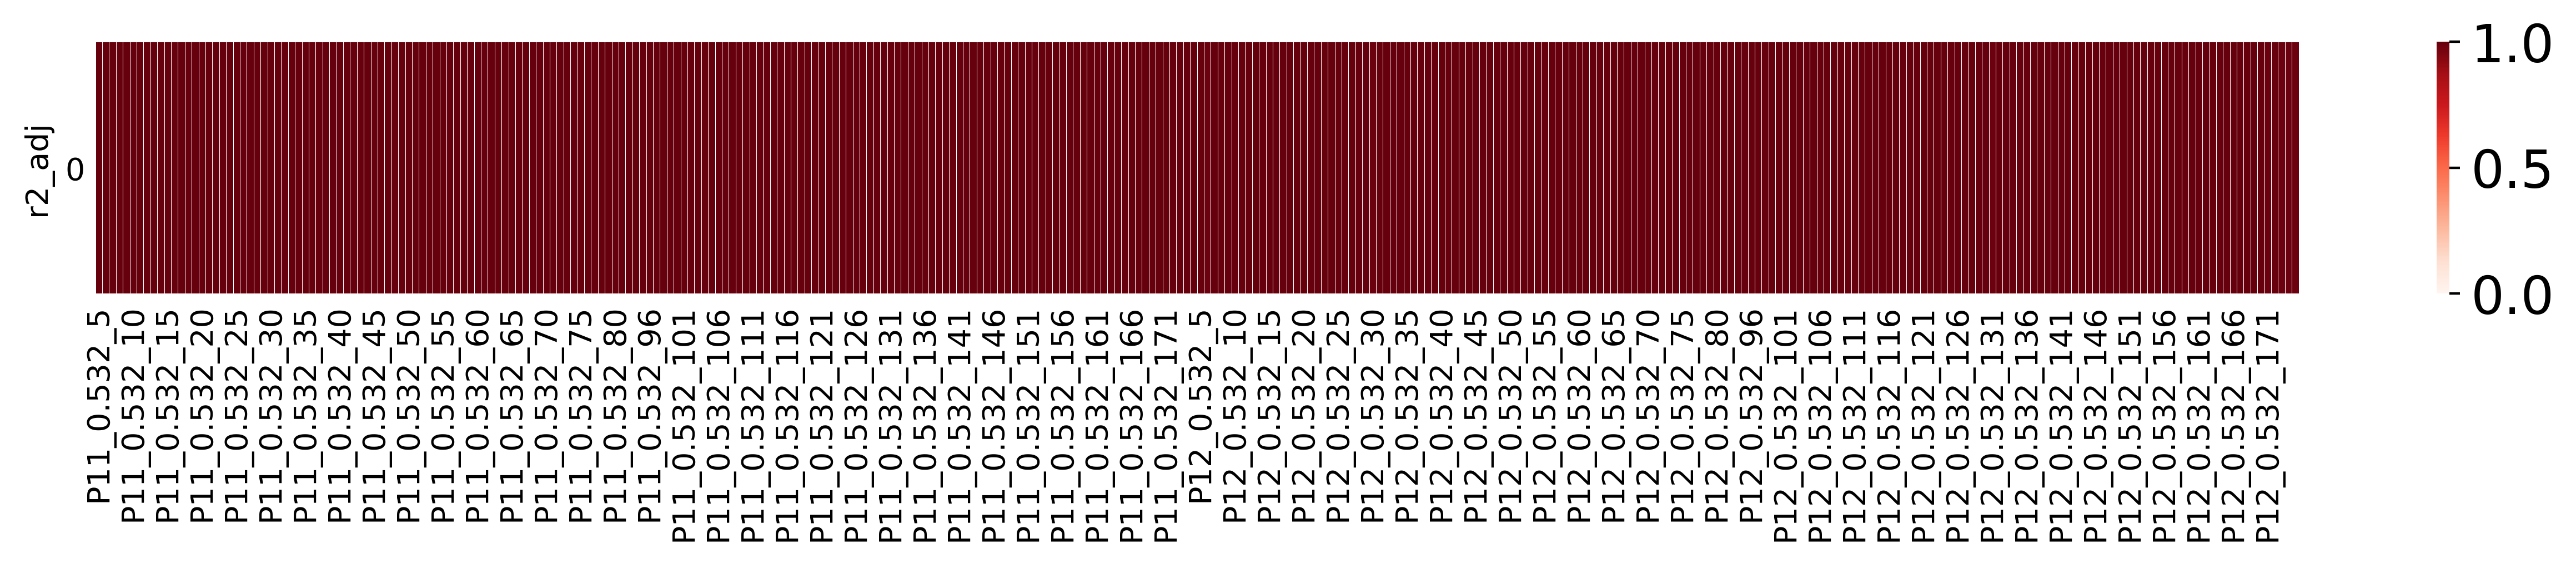

In [72]:
fig, ax = plt.subplots(figsize=(16, 1.5), dpi=400)

sns.heatmap(r2_adj_fw,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
ax.set_ylabel('r2_adj')

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

fig.savefig(f'{plot_dir}/invertible_model_fw_r2_adj.jpg')


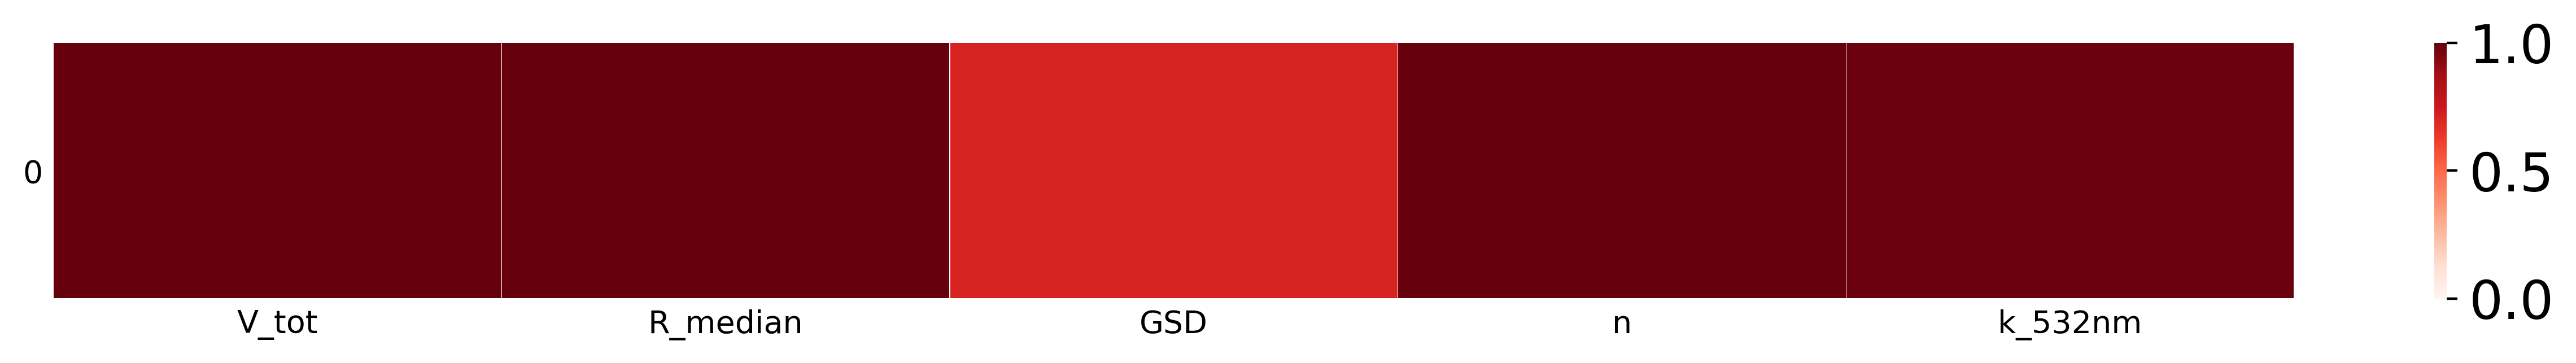

In [73]:
fig, ax = plt.subplots(figsize=(16, 1.5), dpi=400)

sns.heatmap(r2_adj_iv,
            cmap='Reds',
       #     annot=False,
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
      #      annot_kws={'fontsize': 20},
#            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

#fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/invertible_model_inv_r2_adj.jpg')



# Plot Relative Errors

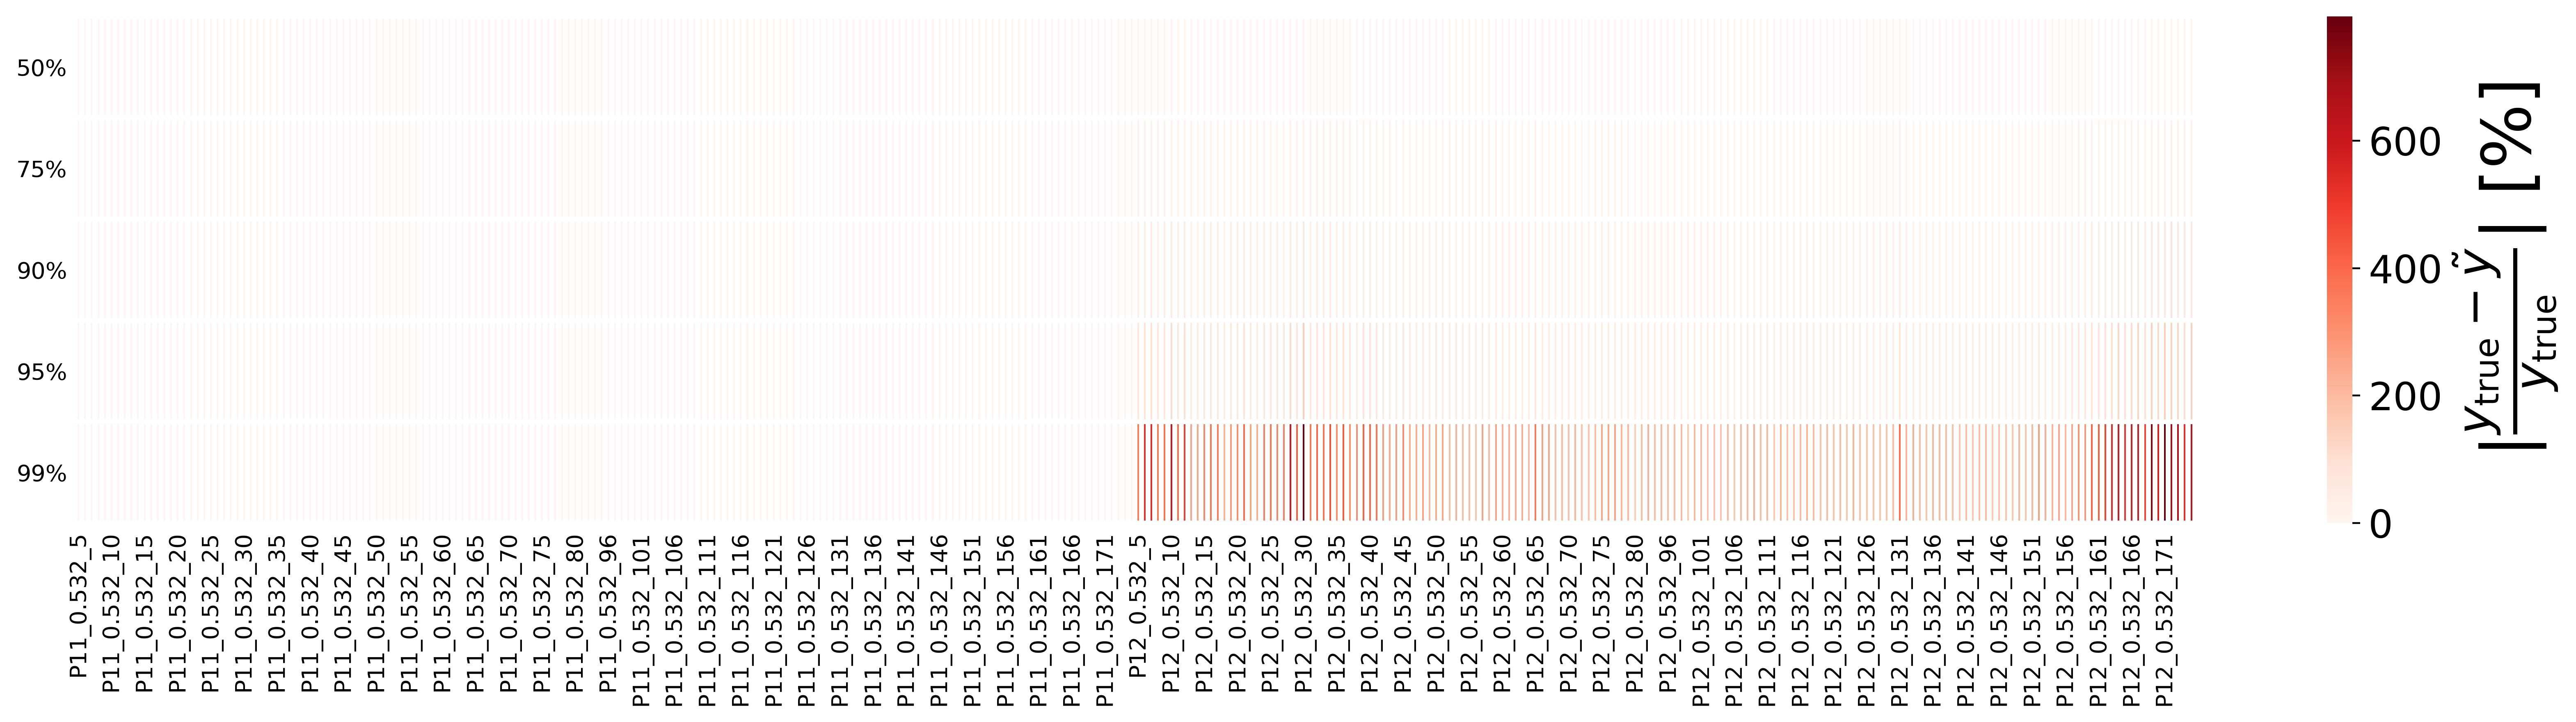

In [74]:
fig, ax = plt.subplots(figsize=(16, 4.5), dpi=400)

sns.heatmap(rel_error_table_fw,
            cmap='Reds',
           # annot=True,
            linewidths=2.,
            vmin=0.,
            vmax=np.max(rel_error_table_fw.max()),
           # annot_kws={'fontsize': 20},
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/forward_rel_error_percentiles.jpg')

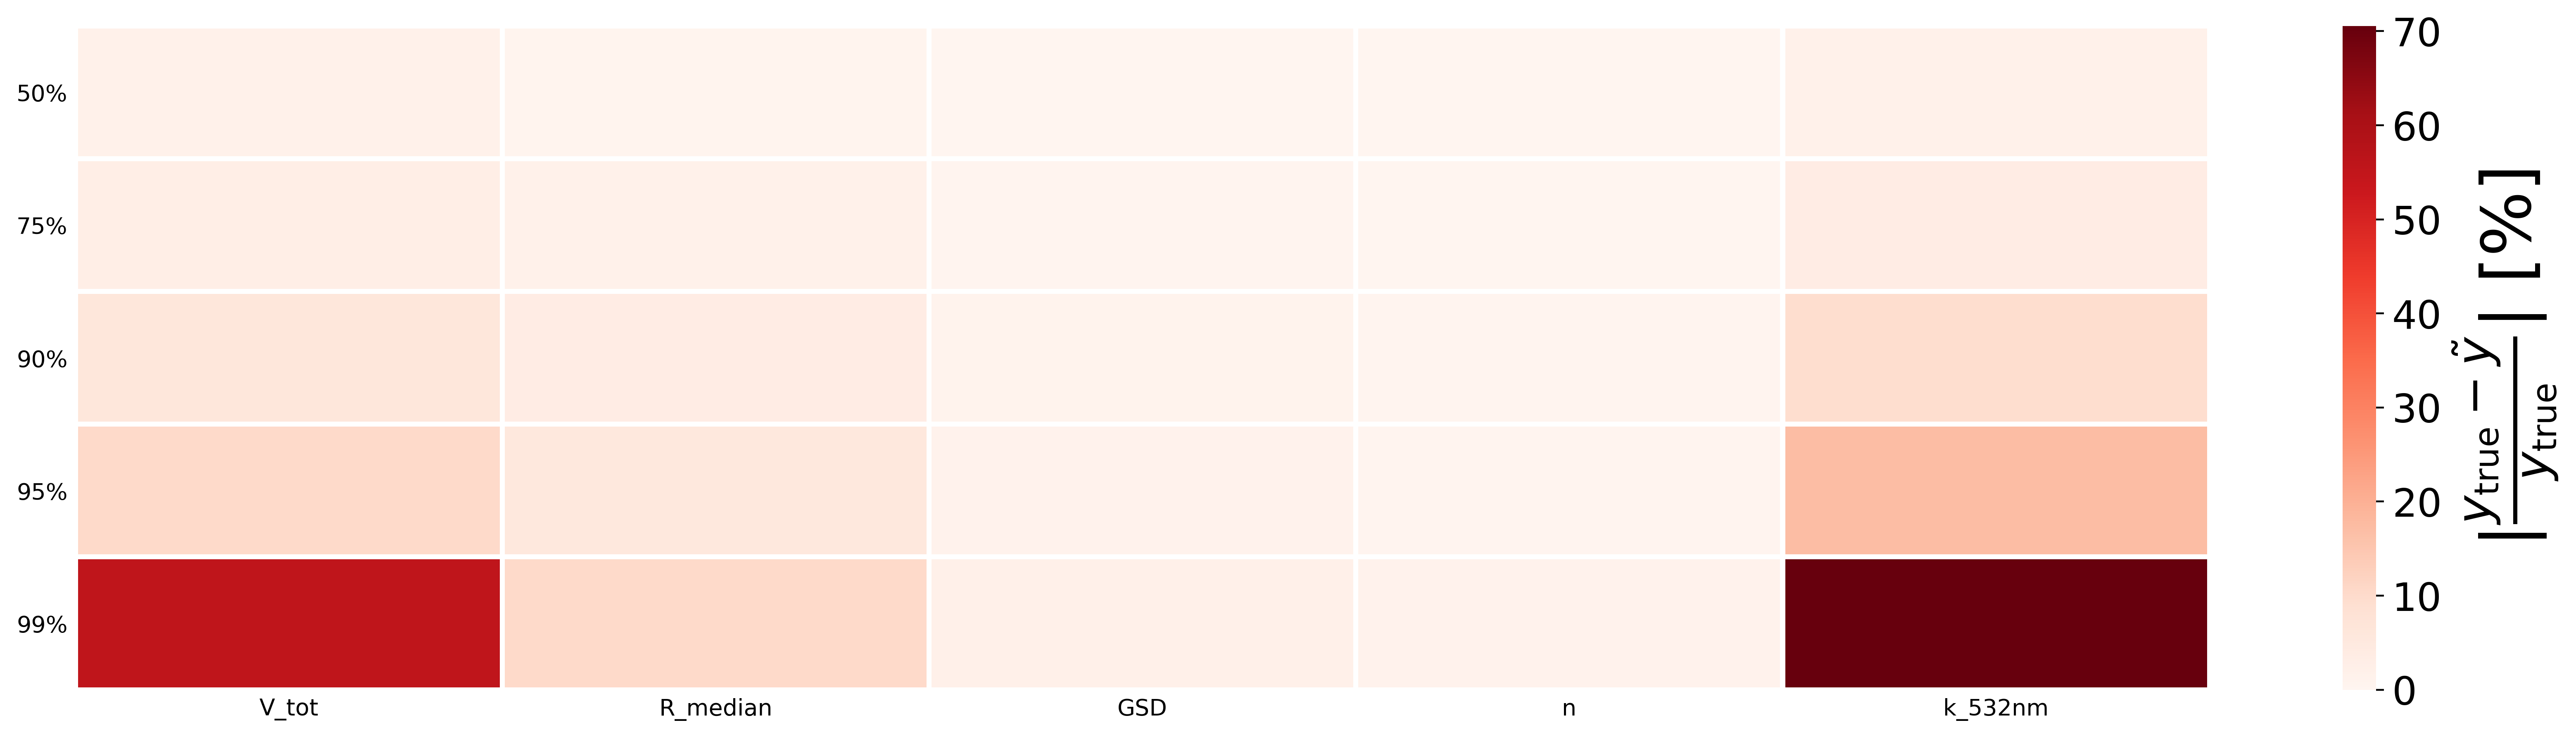

In [75]:
fig, ax = plt.subplots(figsize=(16, 4.5), dpi=400)

sns.heatmap(rel_error_table_iv,
            cmap='Reds',
       #     annot=False,
            linewidths=2.,
            vmin=0.,
            vmax=np.max(rel_error_table_iv.max()),
      #      annot_kws={'fontsize': 20},
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/invertible_sampling_rel_error_percentiles.jpg')


In [76]:
# Rework plots below

In [77]:
surr.model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 324)]             0         
_________________________________________________________________
affine_coupling_block (Affin (None, 324)               59208     
_________________________________________________________________
permutation_layer (Permutati (None, 324)               0         
_________________________________________________________________
affine_coupling_block_1 (Aff (None, 324)               59208     
_________________________________________________________________
permutation_layer_1 (Permuta (None, 324)               0         
_________________________________________________________________
affine_coupling_block_2 (Aff (None, 324)               59208     
_________________________________________________________________
permutation_layer_2 (Permuta (None, 324)               0     

In [78]:
from keras.utils.vis_utils import plot_model

In [79]:
plot_model(surr.model, show_shapes=False,show_layer_names=True,to_file = f'{plot_dir}/model_architecture_invertible.png')


('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


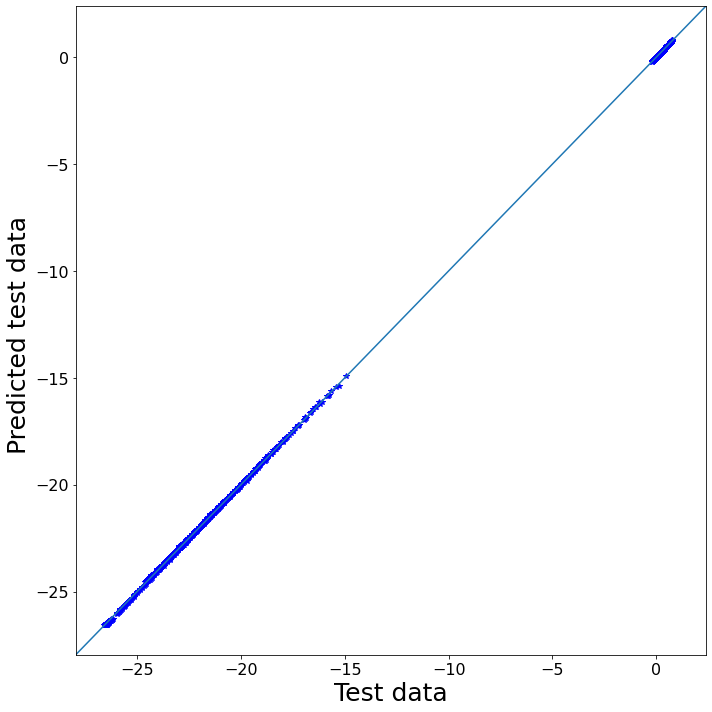

In [80]:
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    ax.plot(qoi_pred_fw.iloc[index],qoi_test.iloc[index],'b*')
    
    #plt.yscale('logit')

ax.set_xlabel('Test data',fontsize = 25)
ax.set_ylabel('Predicted test data ',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 


ax.axline([0, 0], [1, 1])
#fig.align_labels()
#ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data_correlation_fw.jpg')

In [81]:
r2_adj_fw = r2_adj_fw.rename({0: 'r2_adj'}, axis='index')
r2_adj_iv = r2_adj_iv.rename({0: 'r2_adj'}, axis='index')


# create overview plot

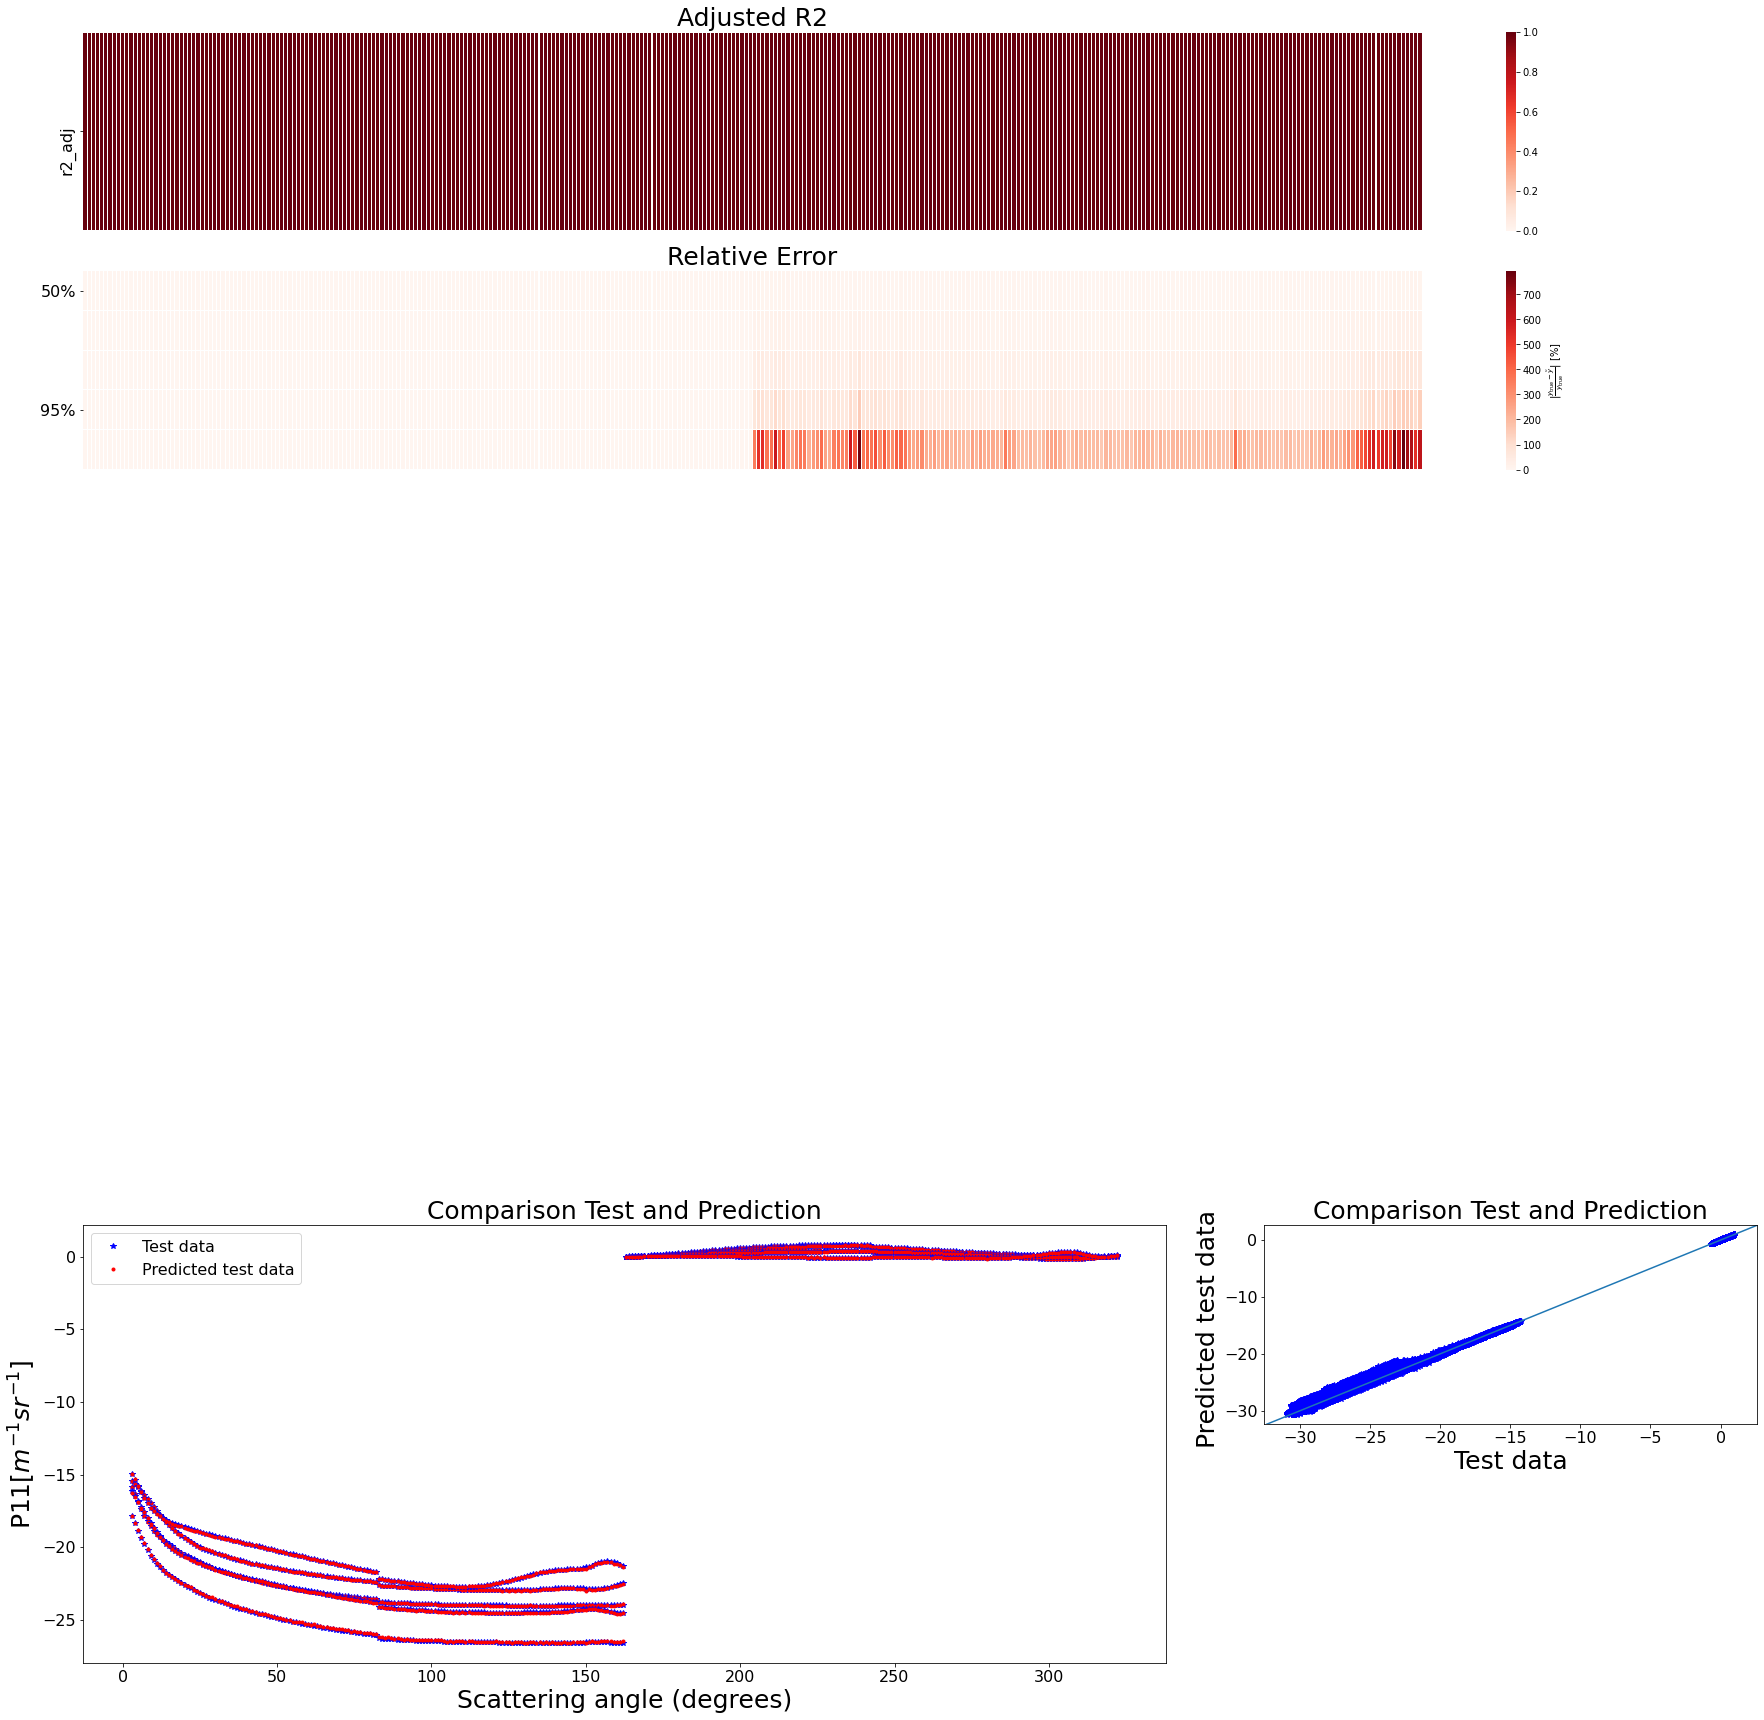

In [82]:
# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(7,3)

plt.subplot2grid((7,3), (0,0), colspan=3, rowspan=1)
sns.heatmap(r2_adj_fw,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
            xticklabels= False)
plt.tick_params(labelsize = 16)    
plt.title( 'Adjusted R2',fontsize = 25)

plt.subplot2grid((7,3), (1,0), colspan =3, rowspan =1)
sns.heatmap(rel_error_table_fw,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=np.max(rel_error_table_fw.max()),
            xticklabels = False,
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'})
plt.tick_params(labelsize = 16)    
plt.title( 'Relative Error',fontsize = 25)


#plt.subplot2grid((7,3), (2,0),colspan = 3, rowspan = 2)
#sns.heatmap(to_plot_fw,
#            vmin=-1.,
#            vmax=1.,
#            linewidths = 0.01,
#            cmap='coolwarm',)
#plt.tick_params(labelsize = 16)
#plt.title( 'Correlation between DVARs and QOIs',fontsize = 25)

plt.subplot2grid((7,3), (5,0), colspan = 2, rowspan = 2)
for index in presentation_plot_index:
    plot_test_data = plt.plot(np.arange(3,len(qoi_test.columns)+3),qoi_test.iloc[index],'b*')
    plot_pred_data = plt.plot(np.arange(3,len(qoi_pred_fw.columns)+3),qoi_pred_fw.iloc[index],'r.')
plt.xlabel('Scattering angle (degrees)',fontsize = 25)
plt.ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
plt.legend(['Test data', 'Predicted test data'], fontsize = 16)
#get_legend().get_title().set_fontsize('16')


plt.subplot2grid((7,3), (5,2), colspan = 1, rowspan = 1)
for index in qoi_test.index.values:
    plt.plot(qoi_test.iloc[index],qoi_pred_fw.iloc[index],'b*')
plt.title( 'Comparison Test and Prediction',fontsize = 25)    
plt.xlabel('Test data',fontsize = 25)
plt.ylabel('Predicted test data ',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.axline([-25, -25], [-8, -8])


fig.set_size_inches(w=30,h=30)
fig.savefig(f'{plot_dir}/overview_invertible_model_fw.jpg')



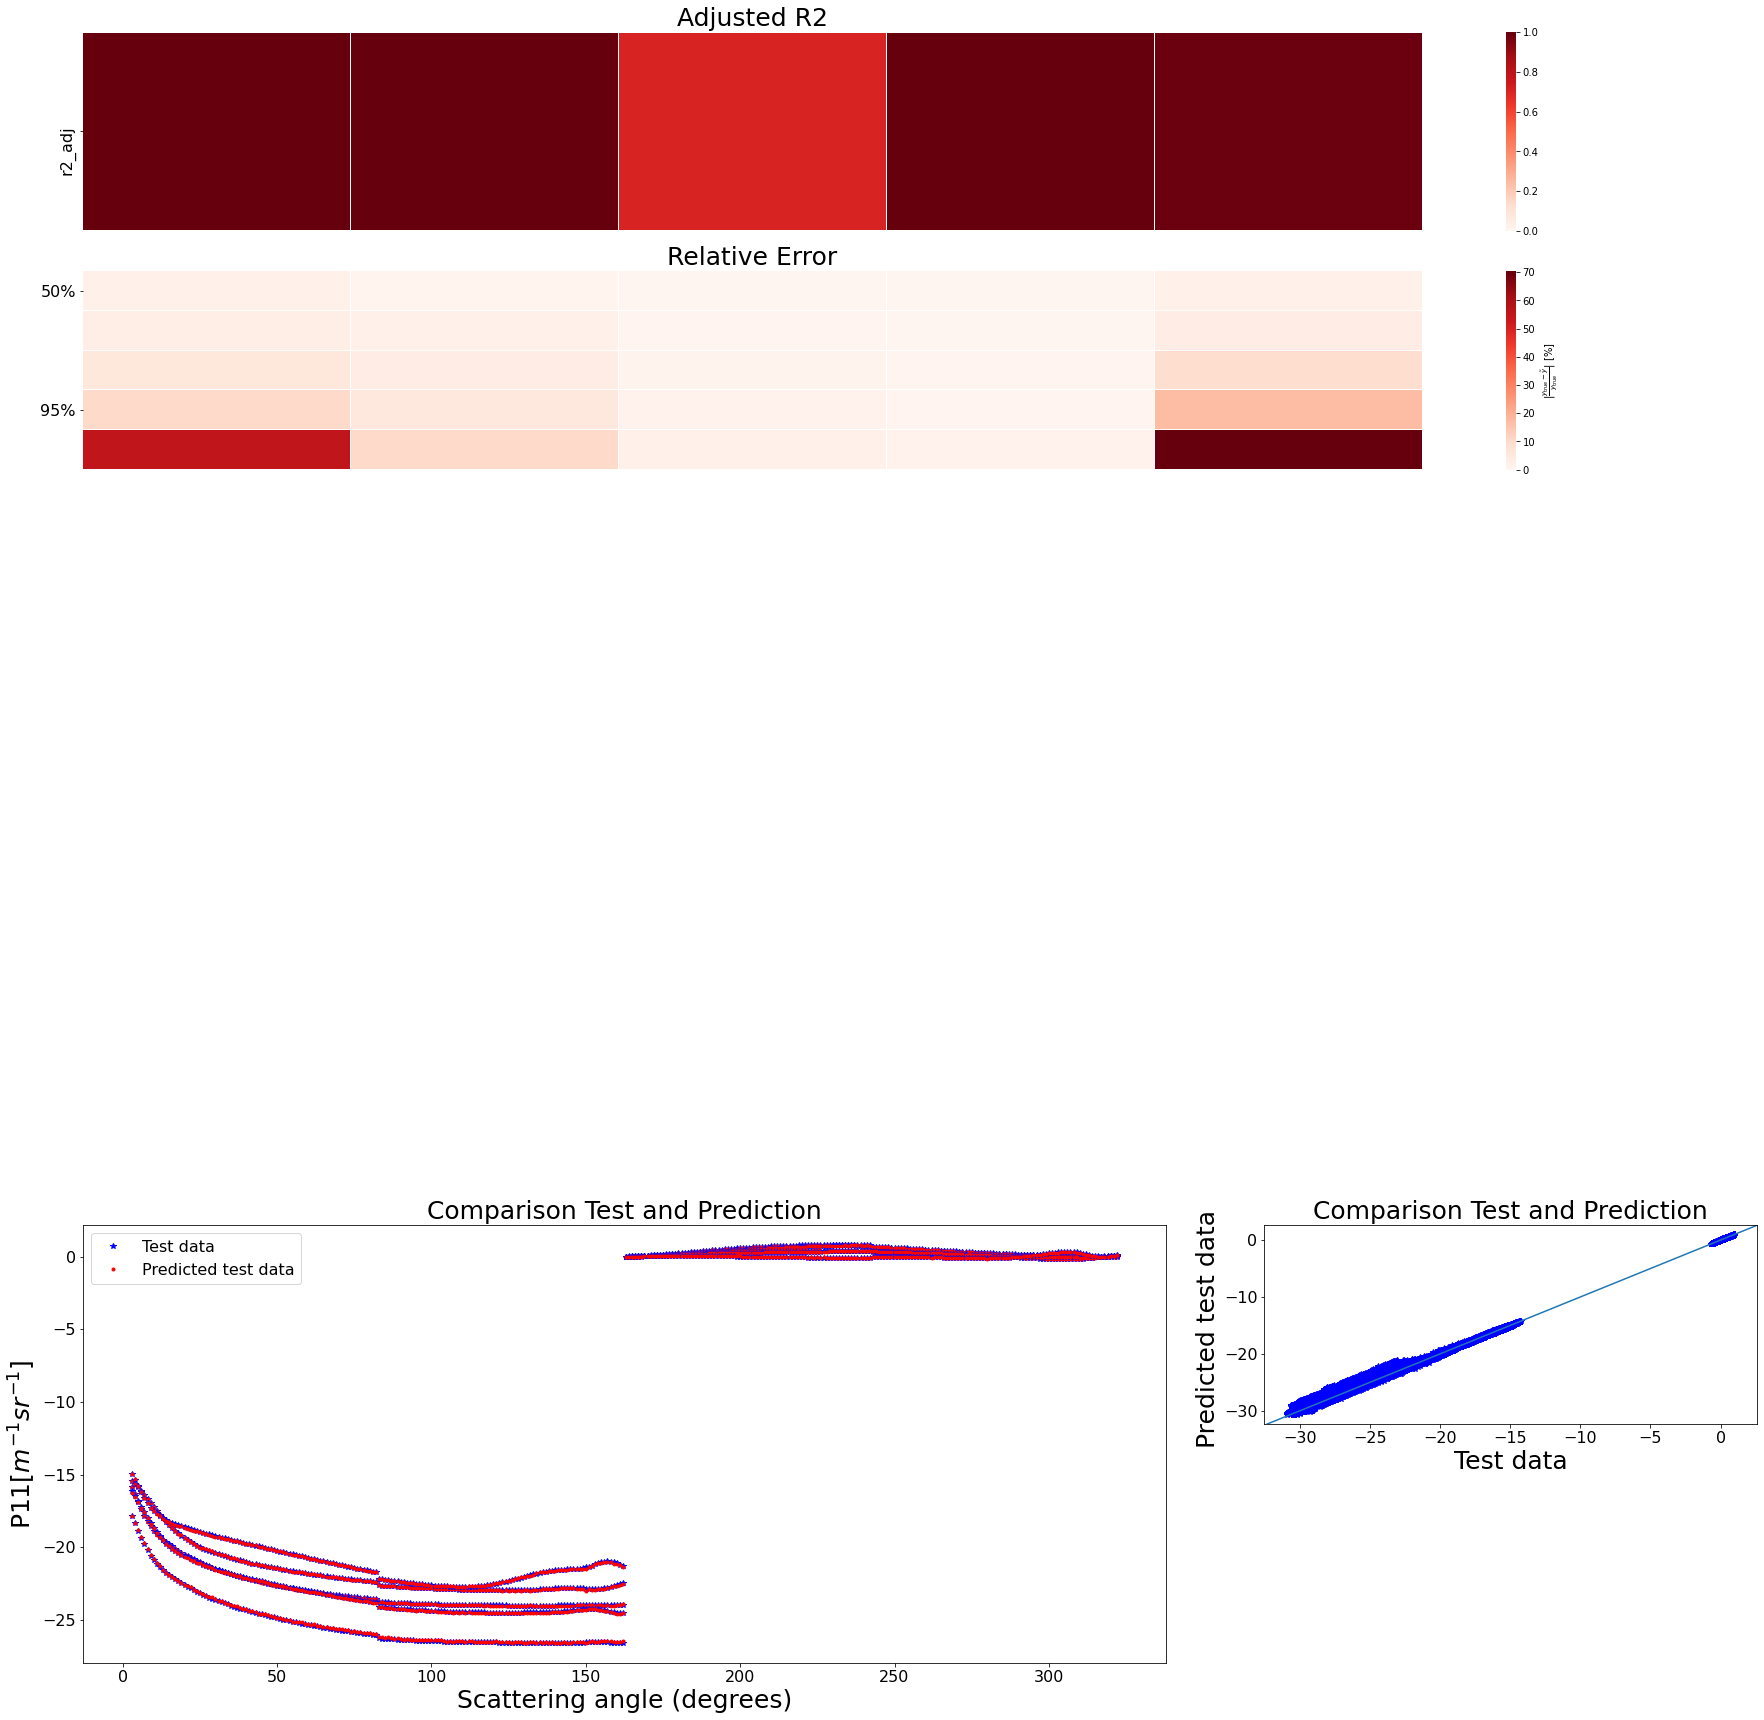

In [83]:
# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(7,3)

plt.subplot2grid((7,3), (0,0), colspan=3, rowspan=1)
sns.heatmap(r2_adj_iv,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
            xticklabels= False)
plt.tick_params(labelsize = 16)    
plt.title( 'Adjusted R2',fontsize = 25)

plt.subplot2grid((7,3), (1,0), colspan =3, rowspan =1)
sns.heatmap(rel_error_table_iv,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=np.max(rel_error_table_iv.max()),
            xticklabels = False,
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'})
plt.tick_params(labelsize = 16)    
plt.title( 'Relative Error',fontsize = 25)


#plt.subplot2grid((7,3), (2,0),colspan = 3, rowspan = 2)
#sns.heatmap(to_plot_iv,
#            vmin=-1.,
#            vmax=1.,
#            linewidths = 0.01,
#            cmap='coolwarm',)
#plt.tick_params(labelsize = 16)
#plt.title( 'Correlation between DVARs and QOIs',fontsize = 25)

plt.subplot2grid((7,3), (5,0), colspan = 2, rowspan = 2)
for index in presentation_plot_index:
    plot_test_data = plt.plot(np.arange(3,len(qoi_test.columns)+3),qoi_test.iloc[index],'b*')
    plot_pred_data = plt.plot(np.arange(3,len(qoi_pred_fw.columns)+3),qoi_pred_fw.iloc[index],'r.')
plt.xlabel('Scattering angle (degrees)',fontsize = 25)
plt.ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
plt.legend(['Test data', 'Predicted test data'], fontsize = 16)
#get_legend().get_title().set_fontsize('16')


plt.subplot2grid((7,3), (5,2), colspan = 1, rowspan = 1)
for index in qoi_test.index.values:
    plt.plot(qoi_test.iloc[index],qoi_pred_fw.iloc[index],'b*')
plt.title( 'Comparison Test and Prediction',fontsize = 25)    
plt.xlabel('Test data',fontsize = 25)
plt.ylabel('Predicted test data ',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.axline([-25, -25], [-8, -8])


fig.set_size_inches(w=30,h=30)
fig.savefig(f'{plot_dir}/overview_invertible_model_iv.jpg')



In [84]:
configs = pd.read_csv(f'{model_dir}/configs.csv')
configs.columns

Index(['Unnamed: 0', 'MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val',
       'MSE_train', 'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'MAE_train_dvar', 'MAE_val_dvar', 'MAPE_train_dvar',
       'MAPE_val_dvar', 'MSE_train_dvar', 'MSE_val_dvar',
       'median_percentile_max_error_train_dvar',
       'median_percentile_max_error_val_dvar',
       '90_percentile_max_error_train_dvar',
       '90_percentile_max_error_val_dvar', 'r2_train_dvar', 'r2_val_dvar',
       'r2_adj_train_dvar', 'r2_adj_val_dvar', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id',
       'config/activation_f

In [85]:
store_results = pd.DataFrame()


In [86]:
store_results['data_file'] = configs['config/datafile']
store_results['batch_size'] = configs['config/batch_size']
store_results['learning_rate'] = configs['config/learning_rate']
store_results['n_blocks'] = configs['config/n_blocks']
store_results['n_depth'] = configs['config/n_depth']
store_results['n_width'] = configs['config/n_width']
store_results['weight_x'] = configs['config/weight_x']
store_results['weight_y'] = configs['config/weight_y']
store_results['weight_z'] = configs['config/weight_z']
store_results['weight_artificial'] = configs['config/weight_artificial']
store_results['weight_reconstruction'] = configs['config/weight_reconstruction']
store_results['r2_val_qoi_max'] = configs['r2_val']
store_results['r2_val_dvar_max'] = configs['r2_val_dvar']
store_results['r2_test_qoi_max'] = np.mean(r2_adj_fw.mean())
store_results['r2_test_dvar_n'] = r2_adj_iv['n']['r2_adj']
store_results['r2_test_dvar_k_532'] = r2_adj_iv['k_532nm']['r2_adj']
store_results['r2_test_dvar_k_450'] = 0#r2_adj_iv['k_450nm']['r2_adj']
store_results['r2_test_dvar_k630'] = 0#r2_adj_iv['k_630nm']['r2_adj']
store_results['r2_test_dvar_V'] = r2_adj_iv['V_tot']['r2_adj']
store_results['r2_test_dvar_R'] = r2_adj_iv['R_median']['r2_adj']
store_results['r2_test_dvar_GSD'] = r2_adj_iv['GSD']['r2_adj']
store_results['r2_test_dvar'] = np.mean(r2_adj_iv.mean())
store_results['rel_error95%_qoi_P11_max'] = rel_error_table_fw_P11.max(axis = 1)['95%']
store_results['rel_error95%_qoi_P12_max'] = rel_error_table_fw_P12.max(axis = 1)['95%']
store_results['rel_error95%_dvar_n'] = rel_error_table_iv['n']['95%']
store_results['rel_error95%_dvar_k_532'] = rel_error_table_iv['k_532nm']['95%']
store_results['rel_error95%_dvar_k_450'] = 0#rel_error_table_iv['k_450nm']['95%']
store_results['rel_error95%_dvar_k_630'] = 0#rel_error_table_iv['k_630nm']['95%']
store_results['rel_error95%_dvar_V'] = rel_error_table_iv['V_tot']['95%']
store_results['rel_error95%_dvar_R'] = rel_error_table_iv['R_median']['95%']
store_results['rel_error95%_dvar_GSD'] = rel_error_table_iv['GSD']['95%']
store_results['MAE%_qoi_max'] = np.max([np.abs(np.min(MAE_all_p)),np.abs(np.max(MAE_all_p))])
store_results['MAE%_dvar_n'] = MAE_dvar_p['n']
store_results['MAE%_dvar_k_532'] = MAE_dvar_p['k_532nm']
store_results['MAE%_dvar_k_450'] = 0#MAE_dvar_p['k_450nm']
store_results['MAE%_dvar_k_630'] = 0#MAE_dvar_p['k_630nm']
store_results['MAE%_dvar_V'] = MAE_dvar_p['V_tot']
store_results['MAE%_dvar_R'] = MAE_dvar_p['R_median']
store_results['MAE%_dvar_GSD'] = MAE_dvar_p['GSD']
store_results['explained_variance_qoi_min'] = np.min(EVS_all_df.min())
store_results['explained_variance_dvar_n'] = EVS_dvar['n']
store_results['explained_variance_dvar_k_532'] = EVS_dvar['k_532nm']
store_results['explained_variance_dvar_k_450'] = 0#EVS_dvar['k_450nm']
store_results['explained_variance_dvar_k_630'] = 0#EVS_dvar['k_630nm']
store_results['explained_variance_dvar_V'] = EVS_dvar['V_tot']
store_results['explained_variance_dvar_R'] = EVS_dvar['R_median']
store_results['explained_variance_dvar_GSD'] = EVS_dvar['GSD']
store_results['preprocessor_x'] = configs['config/preprocessor_x']
store_results['preprocessor_y'] = configs['config/preprocessor_y']

In [87]:
store_results.to_csv(f'{model_dir}/results_summary1.csv')


In [88]:
store_results

data_file  batch_size  \
0  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   

   learning_rate  n_blocks  n_depth  n_width  weight_x  weight_y  weight_z  \
0         0.0005         5        2       40       400       400       400   

   weight_artificial  ...  explained_variance_qoi_min  \
0                  1  ...                    0.992096   

   explained_variance_dvar_n  explained_variance_dvar_k_532  \
0                   0.997727                       0.993668   

   explained_variance_dvar_k_450  explained_variance_dvar_k_630  \
0                              0                              0   

   explained_variance_dvar_V  explained_variance_dvar_R  \
0                    0.99803                   0.999395   

   explained_variance_dvar_GSD  \
0                     0.714762   

                                      preprocessor_x  \
0  <mllib.model.quantiletransformerpreprocessor.Q...   

                                      preprocessor_y  
0  <mllib.model.standardscaler.StandardScaler obj...  

[1 rows x 49 columns]